# Problem Statement
- Car Price Prediction

In [1]:
# Importing Tools

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importing Data
missing_values = ['?']
df = pd.read_csv('autos_dataset.csv',na_values = missing_values)
df

symboling  normalized-losses         make fuel-type aspiration  \
0            3                NaN  alfa-romero       gas        std   
1            3                NaN  alfa-romero       gas        std   
2            1                NaN  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0      111.0   
1            130         mpfi  3.47    2.68               9.0      111.0   
2            152         mpfi  2.68    3.47               9.0      154.0   
3            109         mpfi  3.19    3.40              10.0      102.0   
4            136         mpfi  3.19    3.40               8.0      115.0   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5      114.0   
201          141         mpfi  3.78    3.15               8.7      160.0   
202          173         mpfi  3.58    2.87               8.8      134.0   
203          145          idi  3.01    3.40              23.0      106.0   
204          141         mpfi  3.78    3.15               9.5      114.0   

     peak-rpm city-mpg  highway-mpg    price  
0      5000.0       21           27  13495.0  
1      5000.0       21           27  16500.0  
2      5000.0       19           26  16500.0  
3      5500.0       24           30  13950.0  
4      5500.0       18           22  17450.0  
..        ...      ...          ...      ...  
200    5400.0       23           28  16845.0  
201    5300.0       19           25  19045.0  
202    5500.0       18           23  21485.0  
203    4800.0       26           27  22470.0  
204    5400.0       19           25  22625.0  

[205 rows x 26 columns]

In [3]:
df.sample(10)

symboling  normalized-losses     make fuel-type aspiration num-of-doors  \
34           1              101.0    honda       gas        std          two   
61           1              129.0    mazda       gas        std          two   
137          2              104.0     saab       gas      turbo         four   
99           0              106.0   nissan       gas        std         four   
59           1              129.0    mazda       gas        std          two   
157          0               91.0   toyota       gas        std         four   
132          3              150.0     saab       gas        std          two   
142          0              102.0   subaru       gas        std         four   
60           0              115.0    mazda       gas        std         four   
128          3                NaN  porsche       gas        std          two   

      body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
34     hatchback          fwd           front        93.7  ...           92   
61     hatchback          fwd           front        98.8  ...          122   
137        sedan          fwd           front        99.1  ...          121   
99     hatchback          fwd           front        97.2  ...          120   
59     hatchback          fwd           front        98.8  ...          122   
157    hatchback          fwd           front        95.7  ...           98   
132    hatchback          fwd           front        99.1  ...          121   
142        sedan          fwd           front        97.2  ...          108   
60         sedan          fwd           front        98.8  ...          122   
128  convertible          rwd            rear        89.5  ...          194   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
34          1bbl  2.91    3.41              9.20       76.0    6000.0   
61          2bbl  3.39    3.39              8.60       84.0    4800.0   
137         mpfi  3.54    3.07              9.00      160.0    5500.0   
99          2bbl  3.33    3.47              8.50       97.0    5200.0   
59          2bbl  3.39    3.39              8.60       84.0    4800.0   
157         2bbl  3.19    3.03              9.00       70.0    4800.0   
132         mpfi  3.54    3.07              9.31      110.0    5250.0   
142         2bbl  3.62    2.64              9.50       82.0    4400.0   
60          2bbl  3.39    3.39              8.60       84.0    4800.0   
128         mpfi  3.74    2.90              9.50      207.0    5900.0   

    city-mpg  highway-mpg    price  
34        30           34   7129.0  
61        26           32  10595.0  
137       19           26  18620.0  
99        27           34   8949.0  
59        26           32   8845.0  
157       30           37   7198.0  
132       21           28  11850.0  
142       28           33   7775.0  
60        26           32   8495.0  
128       17           25  37028.0  

[10 rows x 26 columns]

In [4]:
import re

In [5]:
def camel_to_snake(string):
    new = re.sub("[-]+","_","".join([i if i.islower() else "-" + i for i in list(string.strip())]).strip("-")).lower()
    return new

In [6]:
df.columns = list(map(camel_to_snake,df.columns))
df.head()

symboling  normalized_losses         make fuel_type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num_of_doors   body_style drive_wheels engine_location  wheel_base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine_size  fuel_system  bore  stroke compression_ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   
2          152         mpfi  2.68    3.47               9.0      154.0   
3          109         mpfi  3.19    3.40              10.0      102.0   
4          136         mpfi  3.19    3.40               8.0      115.0   

   peak_rpm city_mpg  highway_mpg    price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  
2    5000.0       19           26  16500.0  
3    5500.0       24           30  13950.0  
4    5500.0       18           22  17450.0  

[5 rows x 26 columns]

# EDA

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
df

symboling  normalized_losses           make fuel_type aspiration  \
0            3                NaN    alfa-romero       gas        std   
1            3                NaN    alfa-romero       gas        std   
2            1                NaN    alfa-romero       gas        std   
3            2              164.0           audi       gas        std   
4            2              164.0           audi       gas        std   
5            2                NaN           audi       gas        std   
6            1              158.0           audi       gas        std   
7            1                NaN           audi       gas        std   
8            1              158.0           audi       gas      turbo   
9            0                NaN           audi       gas      turbo   
10           2              192.0            bmw       gas        std   
11           0              192.0            bmw       gas        std   
12           0              188.0            bmw       gas        std   
13           0              188.0            bmw       gas        std   
14           1                NaN            bmw       gas        std   
15           0                NaN            bmw       gas        std   
16           0                NaN            bmw       gas        std   
17           0                NaN            bmw       gas        std   
18           2              121.0      chevrolet       gas        std   
19           1               98.0      chevrolet       gas        std   
20           0               81.0      chevrolet       gas        std   
21           1              118.0          dodge       gas        std   
22           1              118.0          dodge       gas        std   
23           1              118.0          dodge       gas      turbo   
24           1              148.0          dodge       gas        std   
25           1              148.0          dodge       gas        std   
26           1              148.0          dodge       gas        std   
27           1              148.0          dodge       gas      turbo   
28          -1              110.0          dodge       gas        std   
29           3              145.0          dodge       gas      turbo   
30           2              137.0          honda       gas        std   
31           2              137.0          honda       gas        std   
32           1              101.0          honda       gas        std   
33           1              101.0          honda       gas        std   
34           1              101.0          honda       gas        std   
35           0              110.0          honda       gas        std   
36           0               78.0          honda       gas        std   
37           0              106.0          honda       gas        std   
38           0              106.0          honda       gas        std   
39           0               85.0          honda       gas        std   
40           0               85.0          honda       gas        std   
41           0               85.0          honda       gas        std   
42           1              107.0          honda       gas        std   
43           0                NaN          isuzu       gas        std   
44           1                NaN          isuzu       gas        std   
45           0                NaN          isuzu       gas        std   
46           2                NaN          isuzu       gas        std   
47           0              145.0         jaguar       gas        std   
48           0                NaN         jaguar       gas        std   
49           0                NaN         jaguar       gas        std   
50           1              104.0          mazda       gas        std   
51           1              104.0          mazda       gas        std   
52           1              104.0          mazda       gas        std   
53           1              113.0          mazda       gas     

In [10]:
df.shape

(205, 26)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [12]:
df.describe()

symboling  normalized_losses  wheel_base      length       width  \
count  205.000000         164.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          35.442168    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.300000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb_weight  engine_size        bore      stroke  \
count  205.000000   205.000000   205.000000  201.000000  201.000000   
mean    53.724878  2555.565854   126.907317    3.329751    3.255423   
std      2.443522   520.680204    41.642693    0.273539    0.316717   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2145.000000    97.000000    3.150000    3.110000   
50%     54.100000  2414.000000   120.000000    3.310000    3.290000   
75%     55.500000  2935.000000   141.000000    3.590000    3.410000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression_ratio  horsepower     peak_rpm    city_mpg  highway_mpg  \
count         205.000000  203.000000   203.000000  205.000000   205.000000   
mean           10.142537  104.256158  5125.369458   25.219512    30.751220   
std             3.972040   39.714369   479.334560    6.542142     6.886443   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.600000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5200.000000   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            23.000000  288.000000  6600.000000   49.000000    54.000000   

              price  
count    201.000000  
mean   13207.129353  
std     7947.066342  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

In [13]:
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

### Visualization of missing values

<AxesSubplot:>

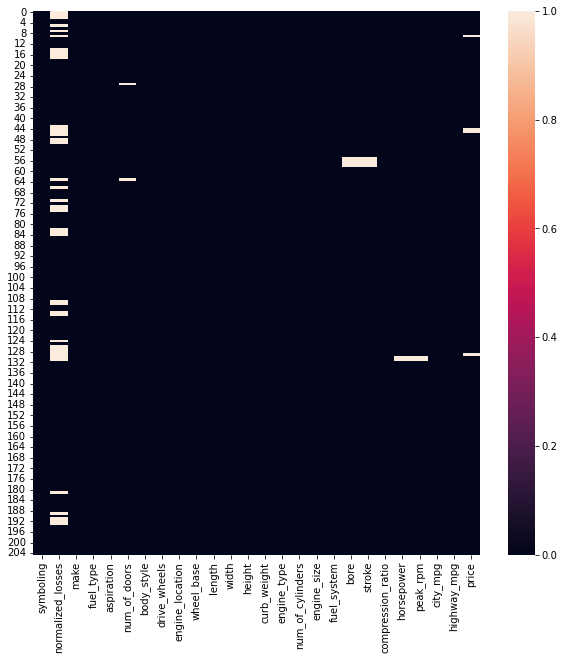

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isna())

# correlation

In [15]:
df.corr()

symboling  normalized_losses  wheel_base    length  \
symboling           1.000000           0.528667   -0.531954 -0.357612   
normalized_losses   0.528667           1.000000   -0.074362  0.023220   
wheel_base         -0.531954          -0.074362    1.000000  0.874587   
length             -0.357612           0.023220    0.874587  1.000000   
width              -0.232919           0.105073    0.795144  0.841118   
height             -0.541038          -0.432335    0.589435  0.491029   
curb_weight        -0.227691           0.119893    0.776386  0.877728   
engine_size        -0.105790           0.167365    0.569329  0.683360   
bore               -0.134205          -0.036167    0.490378  0.607480   
stroke             -0.008965           0.065627    0.161477  0.129739   
compression_ratio  -0.178515          -0.132654    0.249786  0.158414   
horsepower          0.071622           0.295772    0.352297  0.555003   
peak_rpm            0.274573           0.264597   -0.361052 -0.287325   
city_mpg           -0.035823          -0.258502   -0.470414 -0.670909   
highway_mpg         0.034606          -0.210768   -0.544082 -0.704662   
price              -0.082391           0.203254    0.584642  0.690628   

                      width    height  curb_weight  engine_size      bore  \
symboling         -0.232919 -0.541038    -0.227691    -0.105790 -0.134205   
normalized_losses  0.105073 -0.432335     0.119893     0.167365 -0.036167   
wheel_base         0.795144  0.589435     0.776386     0.569329  0.490378   
length             0.841118  0.491029     0.877728     0.683360  0.607480   
width              1.000000  0.279210     0.867032     0.735433  0.559204   
height             0.279210  1.000000     0.295572     0.067149  0.176195   
curb_weight        0.867032  0.295572     1.000000     0.850594  0.649045   
engine_size        0.735433  0.067149     0.850594     1.000000  0.594090   
bore               0.559204  0.176195     0.649045     0.594090  1.000000   
stroke             0.182956 -0.056999     0.168929     0.206675 -0.055909   
compression_ratio  0.181129  0.261214     0.151362     0.028971  0.005203   
horsepower         0.642482 -0.110711     0.751034     0.810773  0.577273   
peak_rpm          -0.219957 -0.322272    -0.266306    -0.244618 -0.264269   
city_mpg          -0.642704 -0.048640    -0.757414    -0.653658 -0.594584   
highway_mpg       -0.677218 -0.107358    -0.797465    -0.677470 -0.594572   
price              0.751265  0.135486     0.834415     0.872335  0.543436   

                     stroke  compression_ratio  horsepower  peak_rpm  \
symboling         -0.008965          -0.178515    0.071622  0.274573   
normalized_losses  0.065627          -0.132654    0.295772  0.264597   
wheel_base         0.161477           0.249786    0.352297 -0.361052   
length             0.129739           0.158414    0.555003 -0.287325   
width              0.182956           0.181129    0.642482 -0.219957   
height            -0.056999           0.261214   -0.110711 -0.322272   
curb_weight        0.168929           0.151362    0.751034 -0.266306   
engine_size        0.206675           0.028971    0.810773 -0.244618   
bore              -0.055909           0.005203    0.577273 -0.264269   
stroke             1.000000           0.186170    0.090254 -0.071493   
compression_ratio  0.186170           1.000000   -0.205874 -0.436221   
horsepower         0.090254          -0.205874    1.000000  0.130971   
peak_rpm          -0.071493          -0.436221    0.130971  1.000000   
city_mpg          -0.042906           0.324701   -0.803620 -0.113788   
highway_mpg       -0.044528           0.265201   -0.770908 -0.054257   
price              0.082310           0.071107    0.810533 -0.101649   

                   city_mpg  highway_mpg     price  
symboling         -0.035823     0.034606 -0.082391  
normalized_losses -0.258502    -0.210768  0.203254  
wheel_base        -0.470414    -0.544082  0.584642  
length            -0.670909   

<AxesSubplot:>

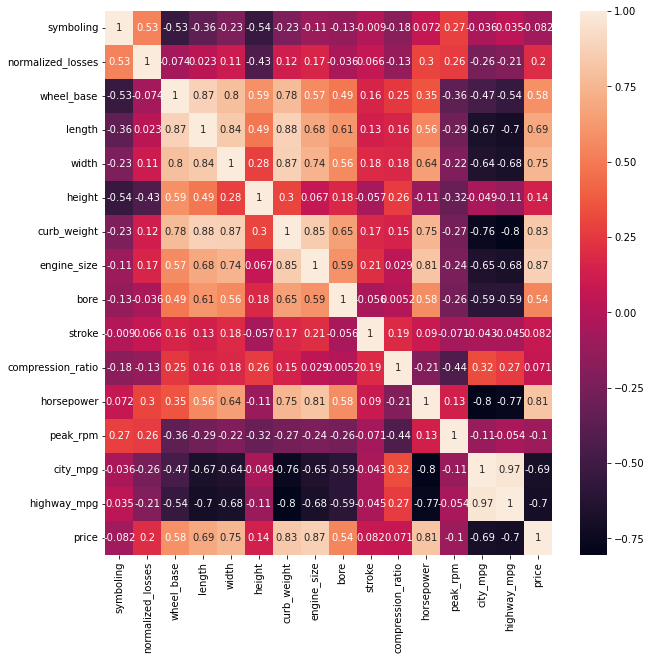

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## Observations
#### Negative Correlation
- highway_mpg – wheel base, length, width, curb_weight, engine_size, bore, horsepower, price
- city – wheel base, length, width, curb_weight, engine_size, bore, horsepower, price
- Price – highway_mpg, city_mpg

#### Positive Correlation
- wheelbase – length, width, height, curb_weight, engine_size, price
- horsepower – length, width, curb_weight, engine_size, bore, price
- Highway mpg – city mpg
- Price – wheel_base, length, width, curb_weight, engine_size, bore, horsepower


###  What is the relation between engine_size and price?

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_size', ylabel='price'>

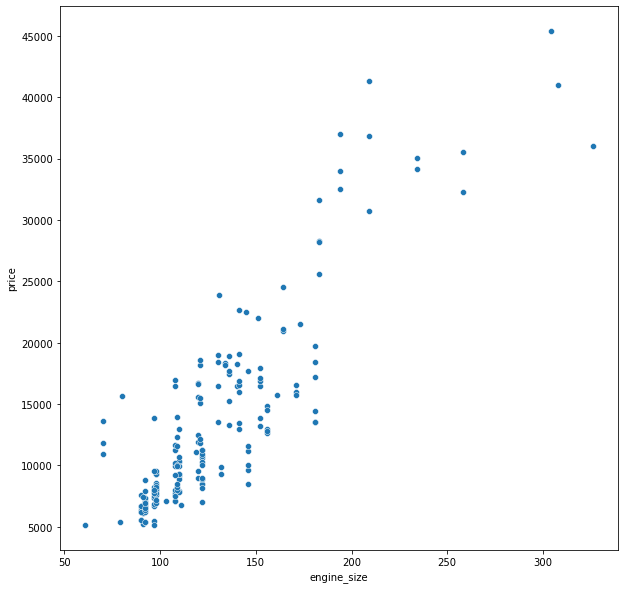

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['engine_size'],df['price'])

## Observations
1. as engine sizes gets increasing price also increases.. we can say that there is positive correlation


### Relation between no. of doors and price

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_of_doors', ylabel='price'>

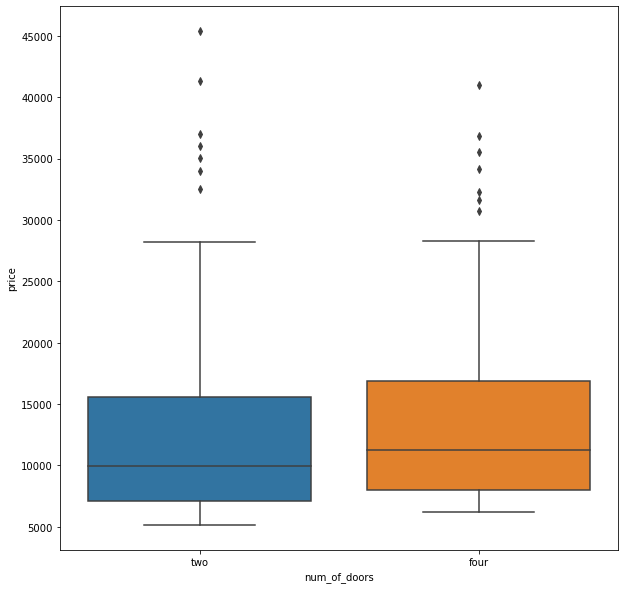

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(df['num_of_doors'],df['price'])

## Check for skewenwss of the target feature

<AxesSubplot:xlabel='price', ylabel='Count'>

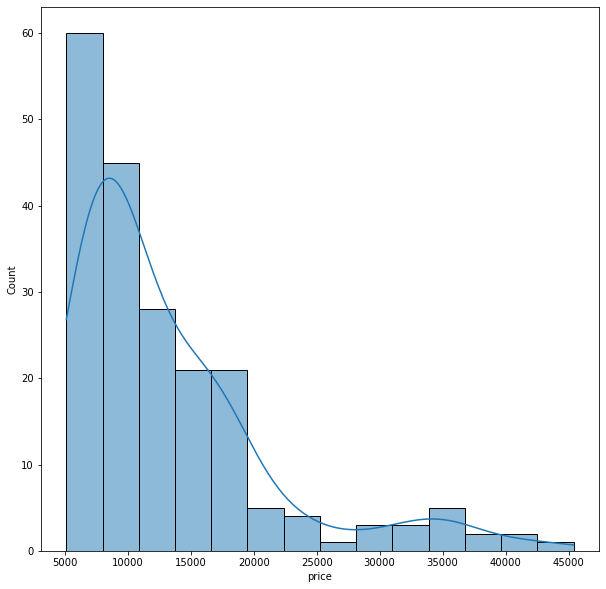

In [19]:
plt.figure(figsize=(10,10))
sns.histplot(df['price'],kde=True)

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

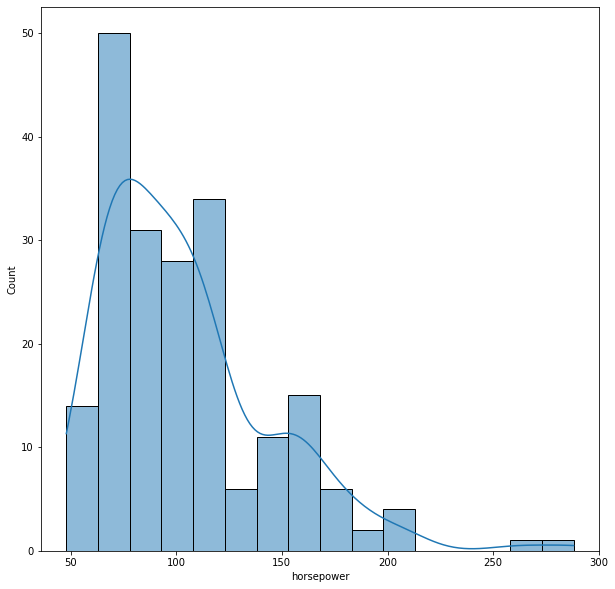

In [20]:
plt.figure(figsize=(10,10))
sns.histplot(df['horsepower'],kde=True)

### how highway_mpg affects price

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway_mpg', ylabel='price'>

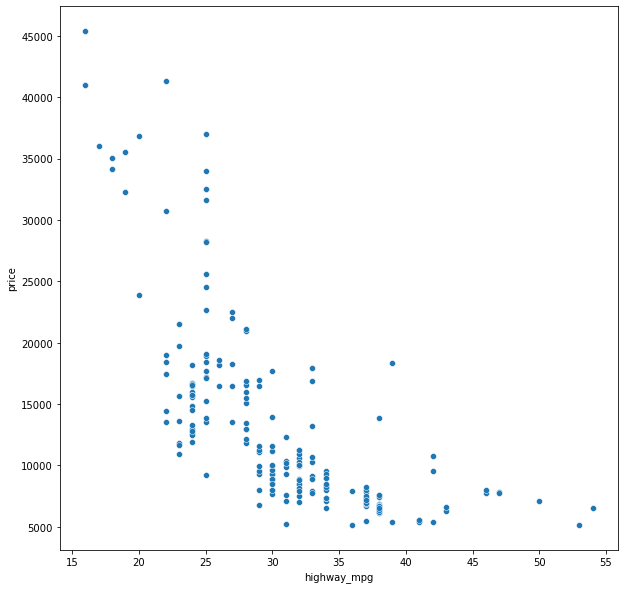

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['highway_mpg'],df['price'])

### city_mpg and price

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_mpg', ylabel='price'>

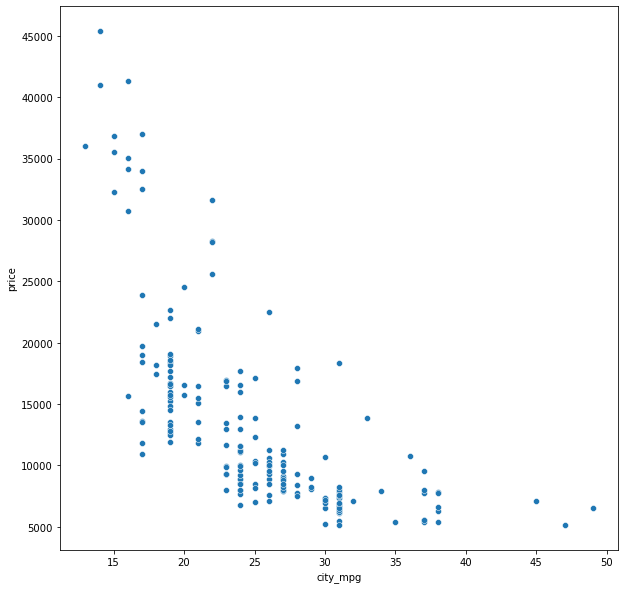

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['city_mpg'],df['price'])

## Observations
1. As we can see that in the graph that the relationship between the city_mpg and price is negative
2.. As we can see that in the graph that the relationship between the highway_mpg and price is negative

### Engine size and price

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_size', ylabel='price'>

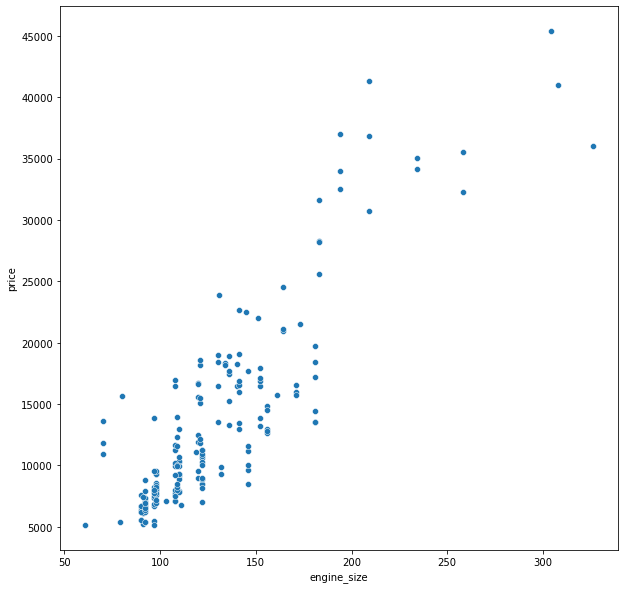

In [23]:
plt.figure(figsize=(10,10)),
sns.scatterplot(df['engine_size'],df['price'])

### length and price

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length', ylabel='price'>

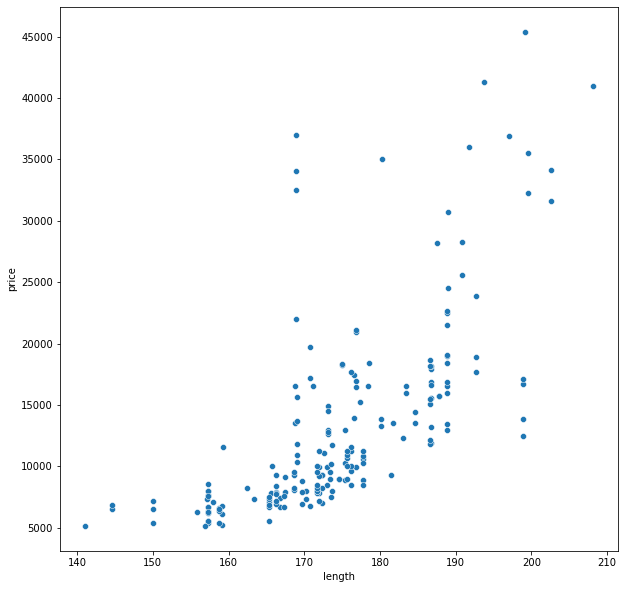

In [24]:
plt.figure(figsize=(10,10)),
sns.scatterplot(df['length'],df['price'])

### fuel_type and price

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='price'>

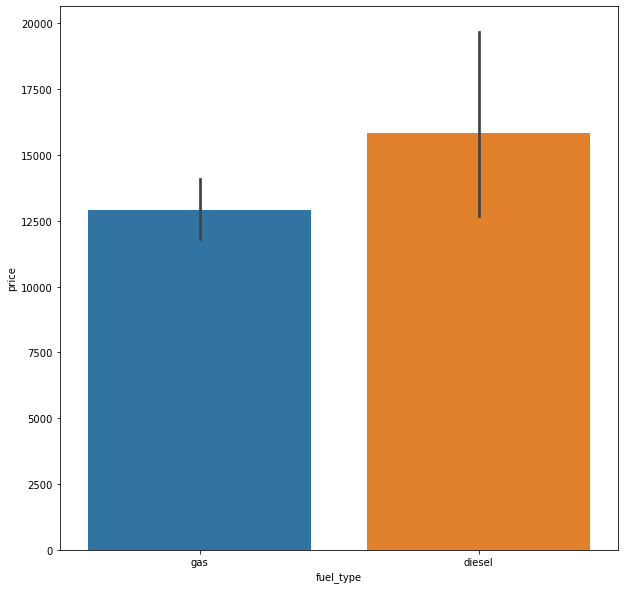

In [25]:
plt.figure(figsize=(10,10))
sns.barplot(df['fuel_type'],df['price'])

### drive_wheels and price

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drive_wheels', ylabel='price'>

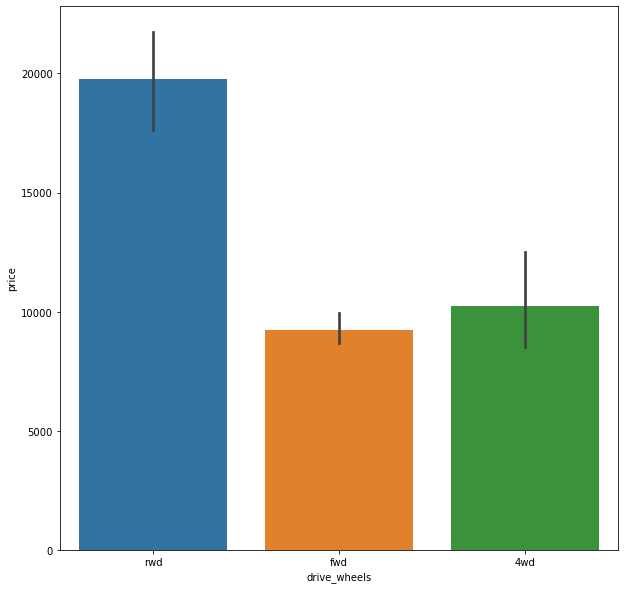

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(df['drive_wheels'],df['price'])

### fuel_system and price

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_system', ylabel='price'>

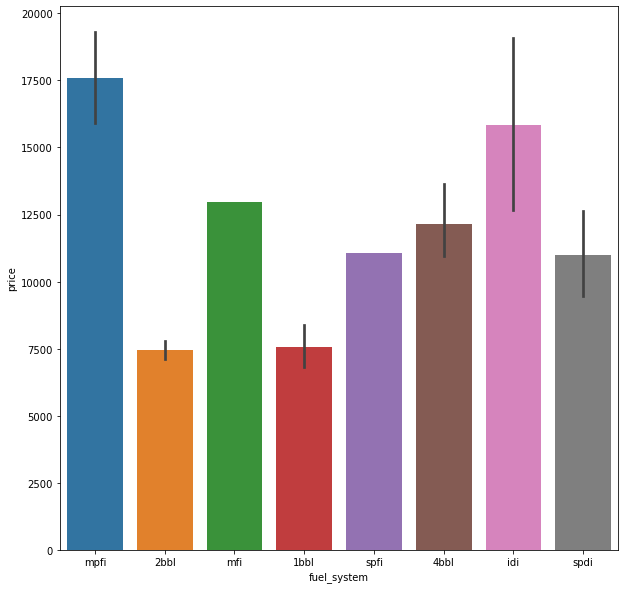

In [27]:
plt.figure(figsize=(10,10))
sns.barplot(df['fuel_system'],df['price'])

# body_style and price

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_style', ylabel='price'>

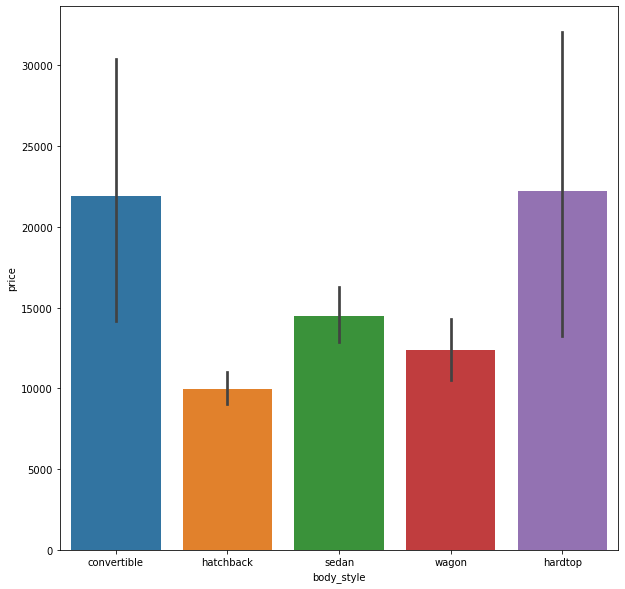

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(df['body_style'],df['price'])

### symboling and price

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='symboling', ylabel='price'>

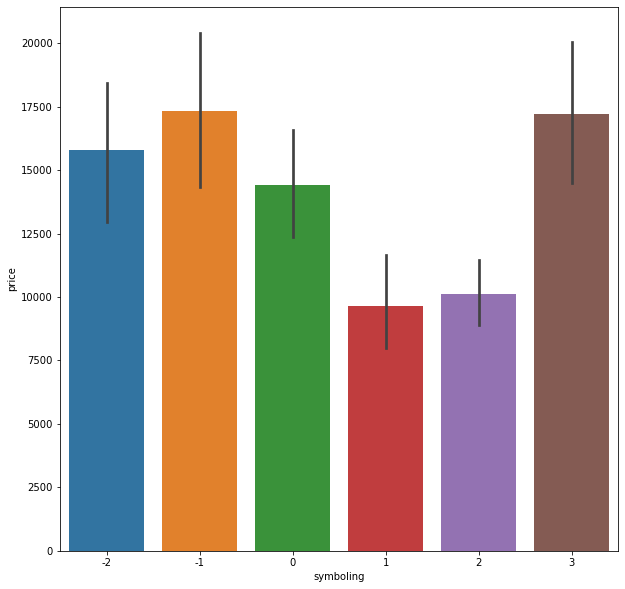

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(df['symboling'],df['price'])

### normalized_losses and price

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='normalized_losses', ylabel='price'>

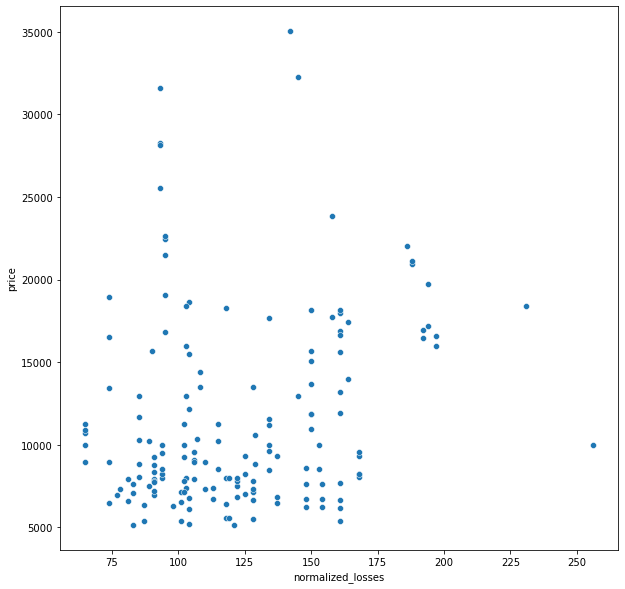

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['normalized_losses'],df['price'])

### make & price

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='make', ylabel='price'>

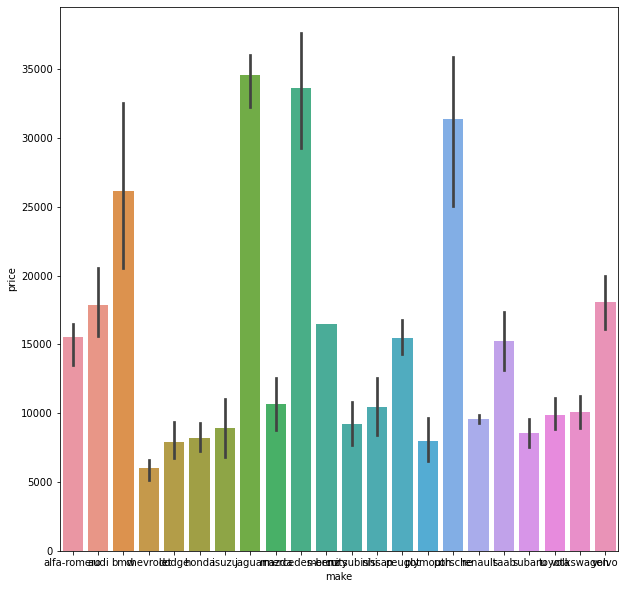

In [31]:
plt.figure(figsize=(10,10))
sns.barplot(df['make'],df['price'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

# Feature Engineering

## 1. Handelling Missing Values

In [33]:
df.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [34]:
# ['normalized_losses','num_of_doors','bore','stroke','horsepower','peak_rpm','price']

#### 1. normalized_losses

In [35]:
df['normalized_losses'].median()

115.0

In [36]:
df['normalized_losses'] = df['normalized_losses'].fillna(df['normalized_losses'].median())
df['normalized_losses']

0      115.0
1      115.0
2      115.0
3      164.0
4      164.0
5      115.0
6      158.0
7      115.0
8      158.0
9      115.0
10     192.0
11     192.0
12     188.0
13     188.0
14     115.0
15     115.0
16     115.0
17     115.0
18     121.0
19      98.0
20      81.0
21     118.0
22     118.0
23     118.0
24     148.0
25     148.0
26     148.0
27     148.0
28     110.0
29     145.0
30     137.0
31     137.0
32     101.0
33     101.0
34     101.0
35     110.0
36      78.0
37     106.0
38     106.0
39      85.0
40      85.0
41      85.0
42     107.0
43     115.0
44     115.0
45     115.0
46     115.0
47     145.0
48     115.0
49     115.0
50     104.0
51     104.0
52     104.0
53     113.0
54     113.0
55     150.0
56     150.0
57     150.0
58     150.0
59     129.0
60     115.0
61     129.0
62     115.0
63     115.0
64     115.0
65     118.0
66     115.0
67      93.0
68      93.0
69      93.0
70      93.0
71     115.0
72     142.0
73     115.0
74     115.0
75     115.0
76     161.0

#### 2. num_of_doors

In [37]:
df['num_of_doors'].unique()

array(['two', 'four', nan], dtype=object)

In [38]:
df['num_of_doors'].value_counts().to_dict()

{'four': 114, 'two': 89}

In [39]:
df['num_of_doors'].mode()

0    four
Name: num_of_doors, dtype: object

In [40]:
df['num_of_doors'] = df['num_of_doors'].fillna(df['num_of_doors'].mode()[0])
df['num_of_doors']

0       two
1       two
2       two
3      four
4      four
5       two
6      four
7      four
8      four
9       two
10      two
11     four
12      two
13     four
14     four
15     four
16      two
17     four
18      two
19      two
20     four
21      two
22      two
23      two
24     four
25     four
26     four
27     four
28     four
29      two
30      two
31      two
32      two
33      two
34      two
35     four
36     four
37      two
38      two
39     four
40     four
41     four
42      two
43     four
44      two
45     four
46      two
47     four
48     four
49      two
50      two
51      two
52      two
53     four
54     four
55      two
56      two
57      two
58      two
59      two
60     four
61      two
62     four
63     four
64     four
65     four
66     four
67     four
68     four
69      two
70     four
71     four
72      two
73     four
74      two
75      two
76      two
77      two
78      two
79      two
80      two
81      two
82      two
83  

#### converting the datatype into int

In [41]:
df['num_of_doors']=df['num_of_doors'].map({'four': 4, 'two':2})
df['num_of_doors']

0      2
1      2
2      2
3      4
4      4
5      2
6      4
7      4
8      4
9      2
10     2
11     4
12     2
13     4
14     4
15     4
16     2
17     4
18     2
19     2
20     4
21     2
22     2
23     2
24     4
25     4
26     4
27     4
28     4
29     2
30     2
31     2
32     2
33     2
34     2
35     4
36     4
37     2
38     2
39     4
40     4
41     4
42     2
43     4
44     2
45     4
46     2
47     4
48     4
49     2
50     2
51     2
52     2
53     4
54     4
55     2
56     2
57     2
58     2
59     2
60     4
61     2
62     4
63     4
64     4
65     4
66     4
67     4
68     4
69     2
70     4
71     4
72     2
73     4
74     2
75     2
76     2
77     2
78     2
79     2
80     2
81     2
82     2
83     2
84     2
85     4
86     4
87     4
88     4
89     2
90     2
91     2
92     4
93     4
94     2
95     2
96     4
97     4
98     2
99     4
100    4
101    4
102    4
103    4
104    2
105    2
106    2
107    4
108    4
109    4
110    4
1

#### 3. bore

In [42]:
df['bore'].median()

3.31

In [43]:
df['bore'] = df['bore'].fillna(df['bore'].median())
df['bore']

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
5      3.19
6      3.19
7      3.19
8      3.13
9      3.13
10     3.50
11     3.50
12     3.31
13     3.31
14     3.31
15     3.62
16     3.62
17     3.62
18     2.91
19     3.03
20     3.03
21     2.97
22     2.97
23     3.03
24     2.97
25     2.97
26     2.97
27     3.03
28     3.34
29     3.60
30     2.91
31     2.91
32     2.91
33     2.91
34     2.91
35     2.91
36     2.92
37     3.15
38     3.15
39     3.15
40     3.15
41     3.15
42     3.15
43     3.31
44     3.03
45     3.03
46     3.43
47     3.63
48     3.63
49     3.54
50     3.03
51     3.03
52     3.03
53     3.03
54     3.08
55     3.31
56     3.31
57     3.31
58     3.31
59     3.39
60     3.39
61     3.39
62     3.39
63     3.39
64     3.39
65     3.76
66     3.43
67     3.58
68     3.58
69     3.58
70     3.58
71     3.46
72     3.46
73     3.80
74     3.80
75     3.78
76     2.97
77     2.97
78     2.97
79     3.03
80     3.17
81     3.35
82     3.58
83  

#### 4. stroke

In [44]:
df['stroke'].median()

3.29

In [45]:
df['stroke']=df['stroke'].fillna(df['stroke'].median())
df['stroke']

0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
5      3.40
6      3.40
7      3.40
8      3.40
9      3.40
10     2.80
11     2.80
12     3.19
13     3.19
14     3.19
15     3.39
16     3.39
17     3.39
18     3.03
19     3.11
20     3.11
21     3.23
22     3.23
23     3.39
24     3.23
25     3.23
26     3.23
27     3.39
28     3.46
29     3.90
30     3.41
31     3.41
32     3.07
33     3.41
34     3.41
35     3.41
36     3.41
37     3.58
38     3.58
39     3.58
40     3.58
41     3.58
42     3.58
43     3.23
44     3.11
45     3.11
46     3.23
47     4.17
48     4.17
49     2.76
50     3.15
51     3.15
52     3.15
53     3.15
54     3.15
55     3.29
56     3.29
57     3.29
58     3.29
59     3.39
60     3.39
61     3.39
62     3.39
63     3.39
64     3.39
65     3.16
66     3.64
67     3.64
68     3.64
69     3.64
70     3.64
71     3.10
72     3.10
73     3.35
74     3.35
75     3.12
76     3.23
77     3.23
78     3.23
79     3.39
80     3.46
81     3.46
82     3.86
83  

#### 5. horsepower

In [46]:
df['horsepower'].median()

95.0

In [47]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())
df['horsepower']

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
5      110.0
6      110.0
7      110.0
8      140.0
9      160.0
10     101.0
11     101.0
12     121.0
13     121.0
14     121.0
15     182.0
16     182.0
17     182.0
18      48.0
19      70.0
20      70.0
21      68.0
22      68.0
23     102.0
24      68.0
25      68.0
26      68.0
27     102.0
28      88.0
29     145.0
30      58.0
31      76.0
32      60.0
33      76.0
34      76.0
35      76.0
36      76.0
37      86.0
38      86.0
39      86.0
40      86.0
41     101.0
42     100.0
43      78.0
44      70.0
45      70.0
46      90.0
47     176.0
48     176.0
49     262.0
50      68.0
51      68.0
52      68.0
53      68.0
54      68.0
55     101.0
56     101.0
57     101.0
58     135.0
59      84.0
60      84.0
61      84.0
62      84.0
63      64.0
64      84.0
65     120.0
66      72.0
67     123.0
68     123.0
69     123.0
70     123.0
71     155.0
72     155.0
73     184.0
74     184.0
75     175.0
76      68.0

#### 6. peak_rpm

In [48]:
df['peak_rpm'].median()

5200.0

In [49]:
df['peak_rpm']=df['peak_rpm'].fillna(df['peak_rpm'].median())
df['peak_rpm']

0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
5      5500.0
6      5500.0
7      5500.0
8      5500.0
9      5500.0
10     5800.0
11     5800.0
12     4250.0
13     4250.0
14     4250.0
15     5400.0
16     5400.0
17     5400.0
18     5100.0
19     5400.0
20     5400.0
21     5500.0
22     5500.0
23     5500.0
24     5500.0
25     5500.0
26     5500.0
27     5500.0
28     5000.0
29     5000.0
30     4800.0
31     6000.0
32     5500.0
33     6000.0
34     6000.0
35     6000.0
36     6000.0
37     5800.0
38     5800.0
39     5800.0
40     5800.0
41     5800.0
42     5500.0
43     4800.0
44     5400.0
45     5400.0
46     5000.0
47     4750.0
48     4750.0
49     5000.0
50     5000.0
51     5000.0
52     5000.0
53     5000.0
54     5000.0
55     6000.0
56     6000.0
57     6000.0
58     6000.0
59     4800.0
60     4800.0
61     4800.0
62     4800.0
63     4650.0
64     4800.0
65     5000.0
66     4200.0
67     4350.0
68     4350.0
69     4350.0
70     4350.0
71    

### 7. Price

In [50]:
df['price'].mean()

13207.129353233831

In [51]:
df['price'] = df['price'].fillna(df['price'].mean())

In [52]:
df['price']

0      13495.000000
1      16500.000000
2      16500.000000
3      13950.000000
4      17450.000000
5      15250.000000
6      17710.000000
7      18920.000000
8      23875.000000
9      13207.129353
10     16430.000000
11     16925.000000
12     20970.000000
13     21105.000000
14     24565.000000
15     30760.000000
16     41315.000000
17     36880.000000
18      5151.000000
19      6295.000000
20      6575.000000
21      5572.000000
22      6377.000000
23      7957.000000
24      6229.000000
25      6692.000000
26      7609.000000
27      8558.000000
28      8921.000000
29     12964.000000
30      6479.000000
31      6855.000000
32      5399.000000
33      6529.000000
34      7129.000000
35      7295.000000
36      7295.000000
37      7895.000000
38      9095.000000
39      8845.000000
40     10295.000000
41     12945.000000
42     10345.000000
43      6785.000000
44     13207.129353
45     13207.129353
46     11048.000000
47     32250.000000
48     35550.000000
49     36000.000000


In [53]:
df.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# checking the dtypes of features and converting to int or float

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    int64  
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [55]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

### 1.symboling

### labelEncoding

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
la = LabelEncoder()

## 1.symboling

In [58]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [59]:
df['symboling'] = la.fit_transform(df['symboling'])
df

symboling  normalized_losses           make fuel_type aspiration  \
0            5              115.0    alfa-romero       gas        std   
1            5              115.0    alfa-romero       gas        std   
2            3              115.0    alfa-romero       gas        std   
3            4              164.0           audi       gas        std   
4            4              164.0           audi       gas        std   
5            4              115.0           audi       gas        std   
6            3              158.0           audi       gas        std   
7            3              115.0           audi       gas        std   
8            3              158.0           audi       gas      turbo   
9            2              115.0           audi       gas      turbo   
10           4              192.0            bmw       gas        std   
11           2              192.0            bmw       gas        std   
12           2              188.0            bmw       gas        std   
13           2              188.0            bmw       gas        std   
14           3              115.0            bmw       gas        std   
15           2              115.0            bmw       gas        std   
16           2              115.0            bmw       gas        std   
17           2              115.0            bmw       gas        std   
18           4              121.0      chevrolet       gas        std   
19           3               98.0      chevrolet       gas        std   
20           2               81.0      chevrolet       gas        std   
21           3              118.0          dodge       gas        std   
22           3              118.0          dodge       gas        std   
23           3              118.0          dodge       gas      turbo   
24           3              148.0          dodge       gas        std   
25           3              148.0          dodge       gas        std   
26           3              148.0          dodge       gas        std   
27           3              148.0          dodge       gas      turbo   
28           1              110.0          dodge       gas        std   
29           5              145.0          dodge       gas      turbo   
30           4              137.0          honda       gas        std   
31           4              137.0          honda       gas        std   
32           3              101.0          honda       gas        std   
33           3              101.0          honda       gas        std   
34           3              101.0          honda       gas        std   
35           2              110.0          honda       gas        std   
36           2               78.0          honda       gas        std   
37           2              106.0          honda       gas        std   
38           2              106.0          honda       gas        std   
39           2               85.0          honda       gas        std   
40           2               85.0          honda       gas        std   
41           2               85.0          honda       gas        std   
42           3              107.0          honda       gas        std   
43           2              115.0          isuzu       gas        std   
44           3              115.0          isuzu       gas        std   
45           2              115.0          isuzu       gas        std   
46           4              115.0          isuzu       gas        std   
47           2              145.0         jaguar       gas        std   
48           2              115.0         jaguar       gas        std   
49           2              115.0         jaguar       gas        std   
50           3              104.0          mazda       gas        std   
51           3              104.0          mazda       gas        std   
52           3              104.0          mazda       gas        std   
53           3              113.0          mazda       gas     

## 2. Make

In [60]:
df['make'] = la.fit_transform(df['make'])
df

symboling  normalized_losses  make fuel_type aspiration  num_of_doors  \
0            5              115.0     0       gas        std             2   
1            5              115.0     0       gas        std             2   
2            3              115.0     0       gas        std             2   
3            4              164.0     1       gas        std             4   
4            4              164.0     1       gas        std             4   
5            4              115.0     1       gas        std             2   
6            3              158.0     1       gas        std             4   
7            3              115.0     1       gas        std             4   
8            3              158.0     1       gas      turbo             4   
9            2              115.0     1       gas      turbo             2   
10           4              192.0     2       gas        std             2   
11           2              192.0     2       gas        std             4   
12           2              188.0     2       gas        std             2   
13           2              188.0     2       gas        std             4   
14           3              115.0     2       gas        std             4   
15           2              115.0     2       gas        std             4   
16           2              115.0     2       gas        std             2   
17           2              115.0     2       gas        std             4   
18           4              121.0     3       gas        std             2   
19           3               98.0     3       gas        std             2   
20           2               81.0     3       gas        std             4   
21           3              118.0     4       gas        std             2   
22           3              118.0     4       gas        std             2   
23           3              118.0     4       gas      turbo             2   
24           3              148.0     4       gas        std             4   
25           3              148.0     4       gas        std             4   
26           3              148.0     4       gas        std             4   
27           3              148.0     4       gas      turbo             4   
28           1              110.0     4       gas        std             4   
29           5              145.0     4       gas      turbo             2   
30           4              137.0     5       gas        std             2   
31           4              137.0     5       gas        std             2   
32           3              101.0     5       gas        std             2   
33           3              101.0     5       gas        std             2   
34           3              101.0     5       gas        std             2   
35           2              110.0     5       gas        std             4   
36           2               78.0     5       gas        std             4   
37           2              106.0     5       gas        std             2   
38           2              106.0     5       gas        std             2   
39           2               85.0     5       gas        std             4   
40           2               85.0     5       gas        std             4   
41           2               85.0     5       gas        std             4   
42           3              107.0     5       gas        std             2   
43           2              115.0     6       gas        std             4   
44           3              115.0     6       gas        std             2   
45           2              115.0     6       gas        std             4   
46           4              115.0     6       gas        std             2   
47           2              145.0     7       gas        std             4   
48           2              115.0     7       gas        std             4   
49           2              115.0     7       gas        std             2   
50           3             

## 3. fuel_type

In [61]:
df['fuel_type'].value_counts()

gas       185
diesel     20
Name: fuel_type, dtype: int64

In [62]:
df['fuel_type'].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

In [63]:
df['fuel_type']= df['fuel_type'].map({'gas': 0, 'diesel': 1})
df['fuel_type']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     1
64     0
65     0
66     1
67     1
68     1
69     1
70     1
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     1
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    1
109    0
110    1
1

## 4. aspiration

In [64]:
df['aspiration'].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [65]:
df['aspiration'] = df['aspiration'].map({'std': 0, 'turbo': 1})
df['aspiration']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      1
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     1
24     0
25     0
26     0
27     1
28     0
29     1
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     1
68     1
69     1
70     1
71     0
72     0
73     0
74     0
75     1
76     0
77     0
78     0
79     1
80     1
81     0
82     1
83     1
84     1
85     0
86     0
87     1
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    1
106    0
107    0
108    1
109    0
110    1
1

## 5. body_style

In [66]:
df['body_style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [67]:
# pd.get_dummies(df['body_style'],drop_first=True)

In [68]:
df['body_style'] = la.fit_transform(df['body_style'])
df

symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
0            5              115.0     0          0           0             2   
1            5              115.0     0          0           0             2   
2            3              115.0     0          0           0             2   
3            4              164.0     1          0           0             4   
4            4              164.0     1          0           0             4   
5            4              115.0     1          0           0             2   
6            3              158.0     1          0           0             4   
7            3              115.0     1          0           0             4   
8            3              158.0     1          0           1             4   
9            2              115.0     1          0           1             2   
10           4              192.0     2          0           0             2   
11           2              192.0     2          0           0             4   
12           2              188.0     2          0           0             2   
13           2              188.0     2          0           0             4   
14           3              115.0     2          0           0             4   
15           2              115.0     2          0           0             4   
16           2              115.0     2          0           0             2   
17           2              115.0     2          0           0             4   
18           4              121.0     3          0           0             2   
19           3               98.0     3          0           0             2   
20           2               81.0     3          0           0             4   
21           3              118.0     4          0           0             2   
22           3              118.0     4          0           0             2   
23           3              118.0     4          0           1             2   
24           3              148.0     4          0           0             4   
25           3              148.0     4          0           0             4   
26           3              148.0     4          0           0             4   
27           3              148.0     4          0           1             4   
28           1              110.0     4          0           0             4   
29           5              145.0     4          0           1             2   
30           4              137.0     5          0           0             2   
31           4              137.0     5          0           0             2   
32           3              101.0     5          0           0             2   
33           3              101.0     5          0           0             2   
34           3              101.0     5          0           0             2   
35           2              110.0     5          0           0             4   
36           2               78.0     5          0           0             4   
37           2              106.0     5          0           0             2   
38           2              106.0     5          0           0             2   
39           2               85.0     5          0           0             4   
40           2               85.0     5          0           0             4   
41           2               85.0     5          0           0             4   
42           3              107.0     5          0           0             2   
43           2              115.0     6          0           0             4   
44           3              115.0     6          0           0             2   
45           2              115.0     6          0           0             4   
46           4              115.0     6          0           0             2   
47           2              145.0     7          0           0             4   
48           2              115.0     7          0           0             4   
49   

## 6. drive_wheels

In [69]:
# list_cat = list(df['drive_wheels'].unique())
# avg_price=[]
# for i in list_cat:
#     avg_price.append(df[(df['drive_wheels']==i)]['price'].mean())
# dict_feature = dict(zip(list_cat,avg_price))
# sorted_dict={key:value for key,value in sorted(dict_feature.items(),key=lambda item:item[1])}

# label_dict = dict()
# label_dict
# label = 0
# for i in sorted_dict.keys():
#     label_dict[i]=label
#     label+=1
# label_dict

In [70]:
df['drive_wheels'].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [71]:
df['drive_wheels'] = df['drive_wheels'].map({'fwd': 0, 'rwd': 1, '4wd': 2})
df['drive_wheels']

0      1
1      1
2      1
3      0
4      2
5      0
6      0
7      0
8      0
9      2
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     1
44     0
45     0
46     1
47     1
48     1
49     1
50     0
51     0
52     0
53     0
54     0
55     1
56     1
57     1
58     1
59     0
60     0
61     0
62     0
63     0
64     0
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

## 7. engine_location

In [72]:
df['engine_location'].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [73]:
df['engine_location'] = df['engine_location'].map({'front': 1, 'rear': 0})
df['engine_location']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

## 8. engine_type

In [74]:
df['engine_type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [75]:
df['engine_type'] = la.fit_transform(df['engine_type'])
df

symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
0            5              115.0     0          0           0             2   
1            5              115.0     0          0           0             2   
2            3              115.0     0          0           0             2   
3            4              164.0     1          0           0             4   
4            4              164.0     1          0           0             4   
5            4              115.0     1          0           0             2   
6            3              158.0     1          0           0             4   
7            3              115.0     1          0           0             4   
8            3              158.0     1          0           1             4   
9            2              115.0     1          0           1             2   
10           4              192.0     2          0           0             2   
11           2              192.0     2          0           0             4   
12           2              188.0     2          0           0             2   
13           2              188.0     2          0           0             4   
14           3              115.0     2          0           0             4   
15           2              115.0     2          0           0             4   
16           2              115.0     2          0           0             2   
17           2              115.0     2          0           0             4   
18           4              121.0     3          0           0             2   
19           3               98.0     3          0           0             2   
20           2               81.0     3          0           0             4   
21           3              118.0     4          0           0             2   
22           3              118.0     4          0           0             2   
23           3              118.0     4          0           1             2   
24           3              148.0     4          0           0             4   
25           3              148.0     4          0           0             4   
26           3              148.0     4          0           0             4   
27           3              148.0     4          0           1             4   
28           1              110.0     4          0           0             4   
29           5              145.0     4          0           1             2   
30           4              137.0     5          0           0             2   
31           4              137.0     5          0           0             2   
32           3              101.0     5          0           0             2   
33           3              101.0     5          0           0             2   
34           3              101.0     5          0           0             2   
35           2              110.0     5          0           0             4   
36           2               78.0     5          0           0             4   
37           2              106.0     5          0           0             2   
38           2              106.0     5          0           0             2   
39           2               85.0     5          0           0             4   
40           2               85.0     5          0           0             4   
41           2               85.0     5          0           0             4   
42           3              107.0     5          0           0             2   
43           2              115.0     6          0           0             4   
44           3              115.0     6          0           0             2   
45           2              115.0     6          0           0             4   
46           4              115.0     6          0           0             2   
47           2              145.0     7          0           0             4   
48           2              115.0     7          0           0             4   
49   

## 9. num_of_cylinders

In [76]:
df['num_of_cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [77]:
df_num_of_cylinders = pd.get_dummies(df['num_of_cylinders'],drop_first=True)
df_num_of_cylinders

five  four  six  three  twelve  two
0       0     1    0      0       0    0
1       0     1    0      0       0    0
2       0     0    1      0       0    0
3       0     1    0      0       0    0
4       1     0    0      0       0    0
5       1     0    0      0       0    0
6       1     0    0      0       0    0
7       1     0    0      0       0    0
8       1     0    0      0       0    0
9       1     0    0      0       0    0
10      0     1    0      0       0    0
11      0     1    0      0       0    0
12      0     0    1      0       0    0
13      0     0    1      0       0    0
14      0     0    1      0       0    0
15      0     0    1      0       0    0
16      0     0    1      0       0    0
17      0     0    1      0       0    0
18      0     0    0      1       0    0
19      0     1    0      0       0    0
20      0     1    0      0       0    0
21      0     1    0      0       0    0
22      0     1    0      0       0    0
23      0     1    0      0       0    0
24      0     1    0      0       0    0
25      0     1    0      0       0    0
26      0     1    0      0       0    0
27      0     1    0      0       0    0
28      0     1    0      0       0    0
29      0     1    0      0       0    0
30      0     1    0      0       0    0
31      0     1    0      0       0    0
32      0     1    0      0       0    0
33      0     1    0      0       0    0
34      0     1    0      0       0    0
35      0     1    0      0       0    0
36      0     1    0      0       0    0
37      0     1    0      0       0    0
38      0     1    0      0       0    0
39      0     1    0      0       0    0
40      0     1    0      0       0    0
41      0     1    0      0       0    0
42      0     1    0      0       0    0
43      0     1    0      0       0    0
44      0     1    0      0       0    0
45      0     1    0      0       0    0
46      0     1    0      0       0    0
47      0     0    1      0       0    0
48      0     0    1      0       0    0
49      0     0    0      0       1    0
50      0     1    0      0       0    0
51      0     1    0      0       0    0
52      0     1    0      0       0    0
53      0     1    0      0       0    0
54      0     1    0      0       0    0
55      0     0    0      0       0    1
56      0     0    0      0       0    1
57      0     0    0      0       0    1
58      0     0    0      0       0    1
59      0     1    0      0       0    0
60      0     1    0      0       0    0
61      0     1    0      0       0    0
62      0     1    0      0       0    0
63      0     1    0      0       0    0
64      0     1    0      0       0    0
65      0     1    0      0       0    0
66      0     1    0      0       0    0
67      1     0    0      0       0    0
68      1     0    0      0       0    0
69      1     0    0      0       0    0
70      1     0    0      0       0    0
71      0     0    0      0       0    0
72      0     0    0      0       0    0
73      0     0    0      0       0    0
74      0     0    0      0       0    0
75      0     1    0      0       0    0
76      0     1    0      0       0    0
77      0     1    0      0       0    0
78      0     1    0      0       0    0
79      0     1    0      0       0    0
80      0     1    0      0       0    0
81      0     1    0      0       0    0
82      0     1    0      0       0    0
83      0     1    0      0       0    0
84      0     1    0      0       0    0
85      0     1    0      0       0    0
86      0     1    0      0       0    0
87      0     1    0      0       0    0
88      0     1    0      0       0    0
89      0     1    0      0       0    0
90      0     1    0      0       0    0
91      0     1    0      0       0    0
92      0     1    0      0       0    0
93      0     1    0      0       0    0
94      0     1    0      0       0    0
95      0     1    0      0       0    0
96      0     1    0      0 

In [78]:
df = pd.concat([df, df_num_of_cylinders], axis=1, join='inner')
df

symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
0            5              115.0     0          0           0             2   
1            5              115.0     0          0           0             2   
2            3              115.0     0          0           0             2   
3            4              164.0     1          0           0             4   
4            4              164.0     1          0           0             4   
5            4              115.0     1          0           0             2   
6            3              158.0     1          0           0             4   
7            3              115.0     1          0           0             4   
8            3              158.0     1          0           1             4   
9            2              115.0     1          0           1             2   
10           4              192.0     2          0           0             2   
11           2              192.0     2          0           0             4   
12           2              188.0     2          0           0             2   
13           2              188.0     2          0           0             4   
14           3              115.0     2          0           0             4   
15           2              115.0     2          0           0             4   
16           2              115.0     2          0           0             2   
17           2              115.0     2          0           0             4   
18           4              121.0     3          0           0             2   
19           3               98.0     3          0           0             2   
20           2               81.0     3          0           0             4   
21           3              118.0     4          0           0             2   
22           3              118.0     4          0           0             2   
23           3              118.0     4          0           1             2   
24           3              148.0     4          0           0             4   
25           3              148.0     4          0           0             4   
26           3              148.0     4          0           0             4   
27           3              148.0     4          0           1             4   
28           1              110.0     4          0           0             4   
29           5              145.0     4          0           1             2   
30           4              137.0     5          0           0             2   
31           4              137.0     5          0           0             2   
32           3              101.0     5          0           0             2   
33           3              101.0     5          0           0             2   
34           3              101.0     5          0           0             2   
35           2              110.0     5          0           0             4   
36           2               78.0     5          0           0             4   
37           2              106.0     5          0           0             2   
38           2              106.0     5          0           0             2   
39           2               85.0     5          0           0             4   
40           2               85.0     5          0           0             4   
41           2               85.0     5          0           0             4   
42           3              107.0     5          0           0             2   
43           2              115.0     6          0           0             4   
44           3              115.0     6          0           0             2   
45           2              115.0     6          0           0             4   
46           4              115.0     6          0           0             2   
47           2              145.0     7          0           0             4   
48           2              115.0     7          0           0             4   
49   

### dropping num_of_cylinders feature

In [79]:
df.drop('num_of_cylinders',axis=1,inplace=True)
df

symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
0            5              115.0     0          0           0             2   
1            5              115.0     0          0           0             2   
2            3              115.0     0          0           0             2   
3            4              164.0     1          0           0             4   
4            4              164.0     1          0           0             4   
5            4              115.0     1          0           0             2   
6            3              158.0     1          0           0             4   
7            3              115.0     1          0           0             4   
8            3              158.0     1          0           1             4   
9            2              115.0     1          0           1             2   
10           4              192.0     2          0           0             2   
11           2              192.0     2          0           0             4   
12           2              188.0     2          0           0             2   
13           2              188.0     2          0           0             4   
14           3              115.0     2          0           0             4   
15           2              115.0     2          0           0             4   
16           2              115.0     2          0           0             2   
17           2              115.0     2          0           0             4   
18           4              121.0     3          0           0             2   
19           3               98.0     3          0           0             2   
20           2               81.0     3          0           0             4   
21           3              118.0     4          0           0             2   
22           3              118.0     4          0           0             2   
23           3              118.0     4          0           1             2   
24           3              148.0     4          0           0             4   
25           3              148.0     4          0           0             4   
26           3              148.0     4          0           0             4   
27           3              148.0     4          0           1             4   
28           1              110.0     4          0           0             4   
29           5              145.0     4          0           1             2   
30           4              137.0     5          0           0             2   
31           4              137.0     5          0           0             2   
32           3              101.0     5          0           0             2   
33           3              101.0     5          0           0             2   
34           3              101.0     5          0           0             2   
35           2              110.0     5          0           0             4   
36           2               78.0     5          0           0             4   
37           2              106.0     5          0           0             2   
38           2              106.0     5          0           0             2   
39           2               85.0     5          0           0             4   
40           2               85.0     5          0           0             4   
41           2               85.0     5          0           0             4   
42           3              107.0     5          0           0             2   
43           2              115.0     6          0           0             4   
44           3              115.0     6          0           0             2   
45           2              115.0     6          0           0             4   
46           4              115.0     6          0           0             2   
47           2              145.0     7          0           0             4   
48           2              115.0     7          0           0             4   
49   

## 10. fuel_system

In [80]:
df['fuel_system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

In [81]:
df['fuel_system'] = la.fit_transform(df['fuel_system'])
df

symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
0            5              115.0     0          0           0             2   
1            5              115.0     0          0           0             2   
2            3              115.0     0          0           0             2   
3            4              164.0     1          0           0             4   
4            4              164.0     1          0           0             4   
5            4              115.0     1          0           0             2   
6            3              158.0     1          0           0             4   
7            3              115.0     1          0           0             4   
8            3              158.0     1          0           1             4   
9            2              115.0     1          0           1             2   
10           4              192.0     2          0           0             2   
11           2              192.0     2          0           0             4   
12           2              188.0     2          0           0             2   
13           2              188.0     2          0           0             4   
14           3              115.0     2          0           0             4   
15           2              115.0     2          0           0             4   
16           2              115.0     2          0           0             2   
17           2              115.0     2          0           0             4   
18           4              121.0     3          0           0             2   
19           3               98.0     3          0           0             2   
20           2               81.0     3          0           0             4   
21           3              118.0     4          0           0             2   
22           3              118.0     4          0           0             2   
23           3              118.0     4          0           1             2   
24           3              148.0     4          0           0             4   
25           3              148.0     4          0           0             4   
26           3              148.0     4          0           0             4   
27           3              148.0     4          0           1             4   
28           1              110.0     4          0           0             4   
29           5              145.0     4          0           1             2   
30           4              137.0     5          0           0             2   
31           4              137.0     5          0           0             2   
32           3              101.0     5          0           0             2   
33           3              101.0     5          0           0             2   
34           3              101.0     5          0           0             2   
35           2              110.0     5          0           0             4   
36           2               78.0     5          0           0             4   
37           2              106.0     5          0           0             2   
38           2              106.0     5          0           0             2   
39           2               85.0     5          0           0             4   
40           2               85.0     5          0           0             4   
41           2               85.0     5          0           0             4   
42           3              107.0     5          0           0             2   
43           2              115.0     6          0           0             4   
44           3              115.0     6          0           0             2   
45           2              115.0     6          0           0             4   
46           4              115.0     6          0           0             2   
47           2              145.0     7          0           0             4   
48           2              115.0     7          0           0             4   
49   

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    int32  
 3   fuel_type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num_of_doors       205 non-null    int64  
 6   body_style         205 non-null    int32  
 7   drive_wheels       205 non-null    int64  
 8   engine_location    205 non-null    int64  
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    int32  
 15  engine_size        205 non-null    int64  
 16  fuel_system        205 non

# Handelling Outliers

In [83]:
df.describe()

symboling  normalized_losses        make   fuel_type  aspiration  \
count  205.000000         205.000000  205.000000  205.000000  205.000000   
mean     2.834146         120.600000   12.195122    0.097561    0.180488   
std      1.245307          31.805105    6.274831    0.297446    0.385535   
min      0.000000          65.000000    0.000000    0.000000    0.000000   
25%      2.000000         101.000000    8.000000    0.000000    0.000000   
50%      3.000000         115.000000   12.000000    0.000000    0.000000   
75%      4.000000         137.000000   19.000000    0.000000    0.000000   
max      5.000000         256.000000   21.000000    1.000000    1.000000   

       num_of_doors  body_style  drive_wheels  engine_location  wheel_base  \
count    205.000000  205.000000    205.000000       205.000000  205.000000   
mean       3.131707    2.614634      0.458537         0.985366   98.756585   
std        0.993715    0.859081      0.581148         0.120377    6.021776   
min        2.000000    0.000000      0.000000         0.000000   86.600000   
25%        2.000000    2.000000      0.000000         1.000000   94.500000   
50%        4.000000    3.000000      0.000000         1.000000   97.000000   
75%        4.000000    3.000000      1.000000         1.000000  102.400000   
max        4.000000    4.000000      2.000000         1.000000  120.900000   

           length       width      height  curb_weight  engine_type  \
count  205.000000  205.000000  205.000000   205.000000   205.000000   
mean   174.049268   65.907805   53.724878  2555.565854     3.014634   
std     12.337289    2.145204    2.443522   520.680204     1.054765   
min    141.100000   60.300000   47.800000  1488.000000     0.000000   
25%    166.300000   64.100000   52.000000  2145.000000     3.000000   
50%    173.200000   65.500000   54.100000  2414.000000     3.000000   
75%    183.100000   66.900000   55.500000  2935.000000     3.000000   
max    208.100000   72.300000   59.800000  4066.000000     6.000000   

       engine_size  fuel_system        bore      stroke  compression_ratio  \
count   205.000000   205.000000  205.000000  205.000000         205.000000   
mean    126.907317     3.253659    3.329366    3.256098          10.142537   
std      41.642693     2.013204    0.270858    0.313634           3.972040   
min      61.000000     0.000000    2.540000    2.070000           7.000000   
25%      97.000000     1.000000    3.150000    3.110000           8.600000   
50%     120.000000     5.000000    3.310000    3.290000           9.000000   
75%     141.000000     5.000000    3.580000    3.410000           9.400000   
max     326.000000     7.000000    3.940000    4.170000          23.000000   

       horsepower     peak_rpm    city_mpg  highway_mpg         price  \
count  205.000000   205.000000  205.000000   205.000000    205.000000   
mean   104.165854  5126.097561   25.219512    30.751220  13207.129353   
std     39.529733   477.035772    6.542142     6.886443   7868.768212   
min     48.000000  4150.000000   13.000000    16.000000   5118.000000   
25%     70.000000  4800.000000   19.000000    25.000000   7788.000000   
50%     95.000000  5200.000000   24.000000    30.000000  10595.000000   
75%    116.000000  5500.000000   30.000000    34.000000  16500.000000   
max    288.000000  6600.000000   49.000000    54.000000  45400.000000   

             five        four         six       three      twelve         two  
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000  
mean     0.053659    0.775610    0.117073    0.004878    0.004878    0.019512  
std      0.225894    0.418201    0.322294    0.069843    0.069843    0.138655  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    1.000000    0.000000    0.000000    0.


- if data is skewed then used IQR 
- if data is normally distrubuted used Z-score

In [84]:
def skewness(df):
    a =df.skew()
    return a

In [85]:
skewness(df)

symboling             0.211072
normalized_losses     0.976114
make                 -0.244671
fuel_type             2.732619
aspiration            1.673832
num_of_doors         -0.267692
body_style           -0.665301
drive_wheels          0.843899
engine_location      -8.143531
wheel_base            1.050214
length                0.155954
width                 0.904003
height                0.063123
curb_weight           0.681398
engine_type          -0.535603
engine_size           1.947655
fuel_system          -0.242995
bore                  0.024511
stroke               -0.696033
compression_ratio     2.610862
horsepower            1.403441
peak_rpm              0.068979
city_mpg              0.663704
highway_mpg           0.539997
price                 1.827324
five                  3.990707
four                 -1.331058
six                   2.399666
three                14.317821
twelve               14.317821
two                   6.998971
dtype: float64

# 1. symboling & 2. normalized_losses

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Expert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='normalized_losses', ylabel='Density'>

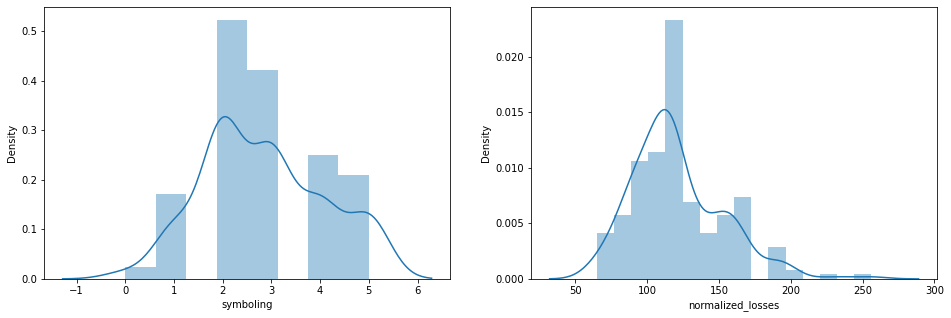

In [86]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['symboling'])

plt.subplot(1,2,2)
sns.distplot(df['normalized_losses'])

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='symboling'>

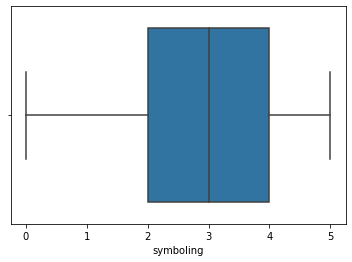

In [87]:
# 1. symboling
sns.boxplot(df['symboling'])


C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='normalized_losses'>

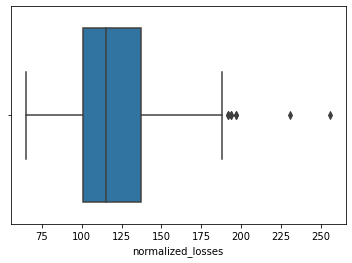

In [88]:
# 2. normalized_losses
sns.boxplot(df['normalized_losses'])

In [89]:
df['normalized_losses'].describe()

count    205.000000
mean     120.600000
std       31.805105
min       65.000000
25%      101.000000
50%      115.000000
75%      137.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [90]:
percentile25 = df['normalized_losses'].quantile(0.25)
percentile75 = df['normalized_losses'].quantile(0.75)
print(percentile25)
print(percentile75)

101.0
137.0


In [91]:
iqr = percentile75 - percentile25
iqr

36.0

In [92]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 -1.5*iqr

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

Upper Limit 191.0
Lower Limit 47.0


In [93]:
df['normalized_losses'] = np.where(df['normalized_losses']>upper_limit,upper_limit, np.where(df['normalized_losses']<lower_limit,lower_limit,df['normalized_losses']))

In [94]:
# def outlier_capping(df['columns']):
#     percentile25 = df['columns'].quantile(0.25)
#     percentile75 = df['columns'].quantile(0.75)
# #     return percentile25 , percentile75
#     upper_limit = percentile75 + 1.5*iqr
#     lower_limit = percentile25 -1.5*iqr
# #     return upper_limit, lower_limit
#     df['columns'] = np.where(df['columns']>upper_limit,upper_limit, np.where(df['columns']<lower_limit,lower_limit,df['columns']))
#     return df['columns']

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='normalized_losses'>

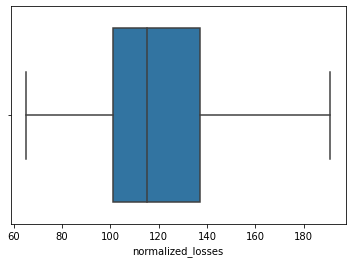

In [95]:
sns.boxplot(df['normalized_losses'])

### make

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='make'>

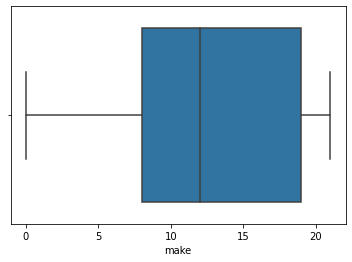

In [96]:
sns.boxplot(df['make'])

### wheel_base

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wheel_base'>

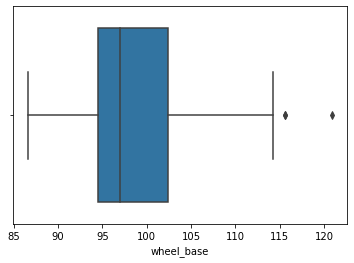

In [97]:
sns.boxplot(df['wheel_base'])

In [98]:
percentile25 = df['wheel_base'].quantile(0.25)
percentile75 = df['wheel_base'].quantile(0.75)
print(percentile25)
print(percentile75)

94.5
102.4


In [99]:
iqr = percentile75-percentile25

In [100]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 -1.5*iqr

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

Upper Limit 114.25000000000001
Lower Limit 82.64999999999999


In [101]:
df['wheel_base'] = np.where(df['wheel_base']>upper_limit,upper_limit, np.where(df['wheel_base']<lower_limit,lower_limit,df['wheel_base']))

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wheel_base'>

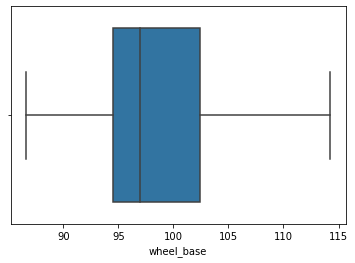

In [102]:
sns.boxplot(df['wheel_base'])

#### length

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length'>

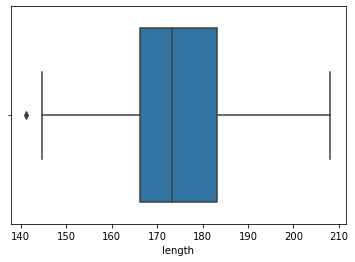

In [103]:

sns.boxplot(df['length'])

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


166.3
183.1
IQR 16.799999999999983
Upper Limit 208.29999999999995
Lower Limit 141.10000000000002
BOX PLOT AFTER HANDELLING MISSING VALUES


<AxesSubplot:xlabel='length'>

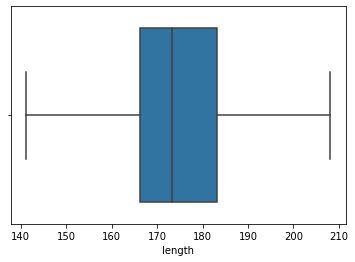

In [104]:
percentile25 = df['length'].quantile(0.25)
percentile75 = df['length'].quantile(0.75)
print(percentile25)
print(percentile75)

iqr = percentile75-percentile25
print('IQR',iqr)

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 -1.5*iqr

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

df['length'] = np.where(df['length']>upper_limit,upper_limit, np.where(df['length']<lower_limit,lower_limit,df['length']))

print('BOX PLOT AFTER HANDELLING MISSING VALUES')
sns.boxplot(df['length'])

#### width

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='width'>

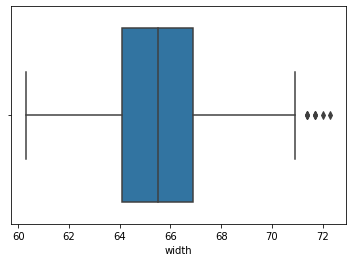

In [105]:
sns.boxplot(df['width'])

64.1
66.9
IQR 2.8000000000000114
Upper Limit 71.10000000000002
Lower Limit 59.89999999999998
BOX PLOT AFTER HANDELLING MISSING VALUES


C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='width'>

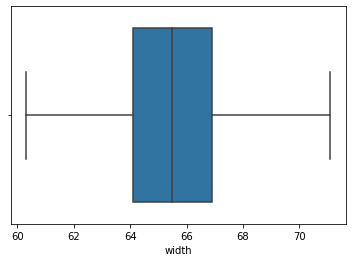

In [106]:
percentile25 = df['width'].quantile(0.25)
percentile75 = df['width'].quantile(0.75)
print(percentile25)
print(percentile75)

iqr = percentile75-percentile25
print('IQR',iqr)

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 -1.5*iqr

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

df['width'] = np.where(df['width']>upper_limit,upper_limit, np.where(df['width']<lower_limit,lower_limit,df['width']))

print('BOX PLOT AFTER HANDELLING MISSING VALUES')
sns.boxplot(df['width'])

#### height

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

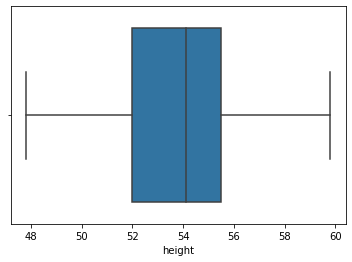

In [107]:
sns.boxplot(df['height'])

#### curb_weight

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='curb_weight'>

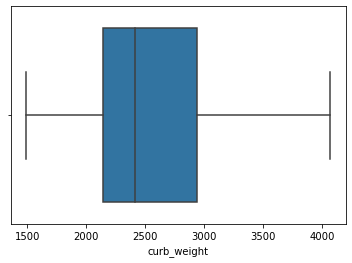

In [108]:
sns.boxplot(df['curb_weight'])

#### engine_size

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_size'>

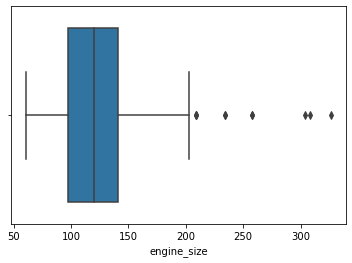

In [109]:
sns.boxplot(df['engine_size'])

97.0
141.0
IQR 44.0
Upper Limit 207.0
Lower Limit 31.0
BOX PLOT AFTER HANDELLING MISSING VALUES


C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_size'>

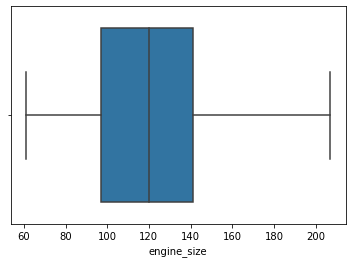

In [110]:
percentile25 = df['engine_size'].quantile(0.25)
percentile75 = df['engine_size'].quantile(0.75)
print(percentile25)
print(percentile75)

iqr = percentile75-percentile25
print('IQR',iqr)

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 -1.5*iqr

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

df['engine_size'] = np.where(df['engine_size']>upper_limit,upper_limit, np.where(df['engine_size']<lower_limit,lower_limit,df['engine_size']))

print('BOX PLOT AFTER HANDELLING MISSING VALUES')
sns.boxplot(df['engine_size'])

#### horsepower

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

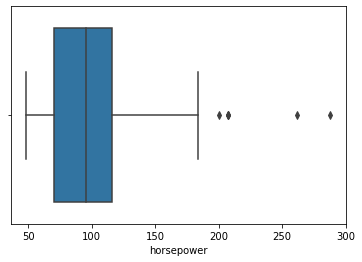

In [111]:
sns.boxplot(df['horsepower'])

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


70.0
116.0
IQR 46.0
Upper Limit 185.0
Lower Limit 1.0
BOX PLOT AFTER HANDELLING MISSING VALUES


<AxesSubplot:xlabel='horsepower'>

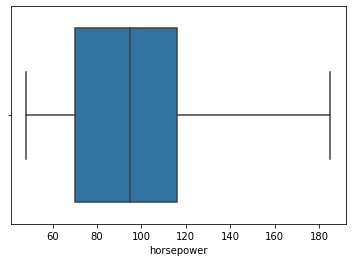

In [112]:
percentile25 = df['horsepower'].quantile(0.25)
percentile75 = df['horsepower'].quantile(0.75)
print(percentile25)
print(percentile75)

iqr = percentile75-percentile25
print('IQR',iqr)

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 -1.5*iqr

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

df['horsepower'] = np.where(df['horsepower']>upper_limit,upper_limit, np.where(df['horsepower']<lower_limit,lower_limit,df['horsepower']))

print('BOX PLOT AFTER HANDELLING MISSING VALUES')
sns.boxplot(df['horsepower'])

#### peak_rpm

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='peak_rpm'>

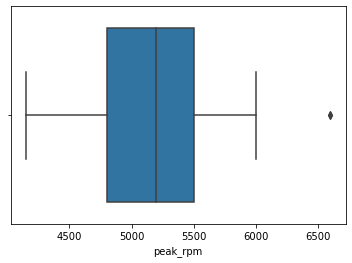

In [113]:
sns.boxplot(df['peak_rpm'])

4800.0
5500.0
IQR 700.0
Upper Limit 6550.0
Lower Limit 3750.0
BOX PLOT AFTER HANDELLING MISSING VALUES


C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='peak_rpm'>

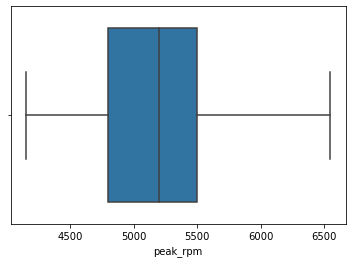

In [114]:
percentile25 = df['peak_rpm'].quantile(0.25)
percentile75 = df['peak_rpm'].quantile(0.75)
print(percentile25)
print(percentile75)

iqr = percentile75-percentile25
print('IQR',iqr)

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 -1.5*iqr

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

df['peak_rpm'] = np.where(df['peak_rpm']>upper_limit,upper_limit, np.where(df['peak_rpm']<lower_limit,lower_limit,df['peak_rpm']))

print('BOX PLOT AFTER HANDELLING MISSING VALUES')
sns.boxplot(df['peak_rpm'])

#### stroke

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke'>

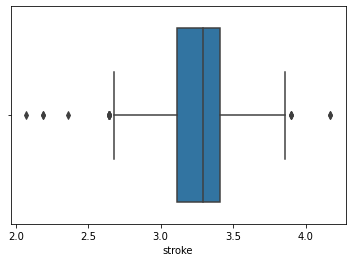

In [115]:
sns.boxplot(df['stroke'])

3.11
3.41
IQR 0.30000000000000027
Upper Limit 3.8600000000000003
Lower Limit 2.6599999999999993
BOX PLOT AFTER HANDELLING MISSING VALUES


C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke'>

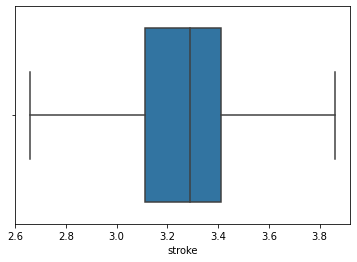

In [116]:
percentile25 = df['stroke'].quantile(0.25)
percentile75 = df['stroke'].quantile(0.75)
print(percentile25)
print(percentile75)

iqr = percentile75-percentile25
print('IQR',iqr)

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 -1.5*iqr

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

df['stroke'] = np.where(df['stroke']>upper_limit,upper_limit, np.where(df['stroke']<lower_limit,lower_limit,df['stroke']))

print('BOX PLOT AFTER HANDELLING MISSING VALUES')
sns.boxplot(df['stroke'])

#### compression_ratio

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='compression_ratio'>

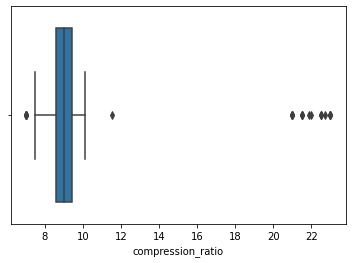

In [117]:
sns.boxplot(df['compression_ratio'])

8.6
9.4
IQR 0.8000000000000007
Upper Limit 10.600000000000001
Lower Limit 7.399999999999999
BOX PLOT AFTER HANDELLING MISSING VALUES


C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='compression_ratio'>

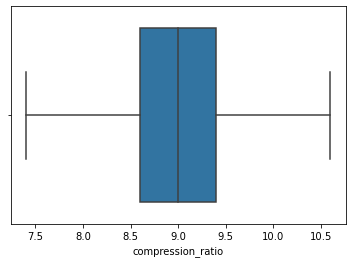

In [118]:
percentile25 = df['compression_ratio'].quantile(0.25)
percentile75 = df['compression_ratio'].quantile(0.75)
print(percentile25)
print(percentile75)

iqr = percentile75-percentile25
print('IQR',iqr)

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 -1.5*iqr

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

df['compression_ratio'] = np.where(df['compression_ratio']>upper_limit,upper_limit, np.where(df['compression_ratio']<lower_limit,lower_limit,df['compression_ratio']))

print('BOX PLOT AFTER HANDELLING MISSING VALUES')
sns.boxplot(df['compression_ratio'])

#### city_mpg

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_mpg'>

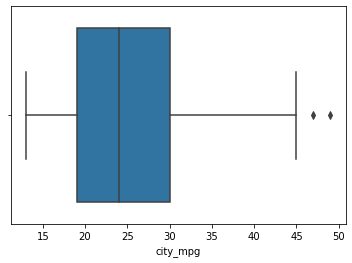

In [119]:
sns.boxplot(df['city_mpg'])

19.0
30.0
IQR 11.0
Upper Limit 46.5
Lower Limit 2.5
BOX PLOT AFTER HANDELLING MISSING VALUES


C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_mpg'>

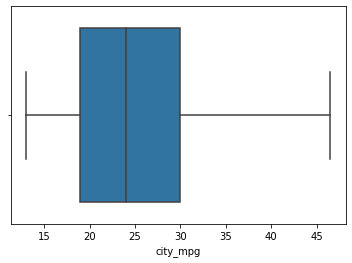

In [120]:
percentile25 = df['city_mpg'].quantile(0.25)
percentile75 = df['city_mpg'].quantile(0.75)
print(percentile25)
print(percentile75)

iqr = percentile75-percentile25
print('IQR',iqr)

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 -1.5*iqr

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

df['city_mpg'] = np.where(df['city_mpg']>upper_limit,upper_limit, np.where(df['city_mpg']<lower_limit,lower_limit,df['city_mpg']))

print('BOX PLOT AFTER HANDELLING MISSING VALUES')
sns.boxplot(df['city_mpg'])

#### highway_mpg

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway_mpg'>

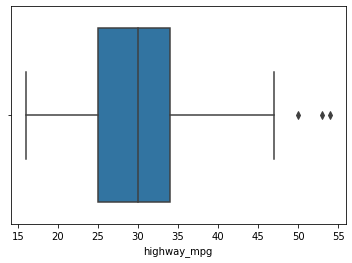

In [121]:
sns.boxplot(df['highway_mpg'])

25.0
34.0
IQR 9.0
Upper Limit 47.5
Lower Limit 11.5
BOX PLOT AFTER HANDELLING MISSING VALUES


C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway_mpg'>

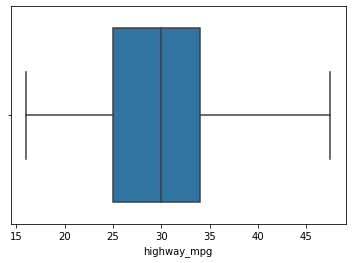

In [122]:
percentile25 = df['highway_mpg'].quantile(0.25)
percentile75 = df['highway_mpg'].quantile(0.75)
print(percentile25)
print(percentile75)

iqr = percentile75-percentile25
print('IQR',iqr)

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 -1.5*iqr

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

df['highway_mpg'] = np.where(df['highway_mpg']>upper_limit,upper_limit, np.where(df['highway_mpg']<lower_limit,lower_limit,df['highway_mpg']))

print('BOX PLOT AFTER HANDELLING MISSING VALUES')
sns.boxplot(df['highway_mpg'])

In [123]:
df.head()

symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
0          5              115.0     0          0           0             2   
1          5              115.0     0          0           0             2   
2          3              115.0     0          0           0             2   
3          4              164.0     1          0           0             4   
4          4              164.0     1          0           0             4   

   body_style  drive_wheels  engine_location  wheel_base  length  width  \
0           0             1                1        88.6   168.8   64.1   
1           0             1                1        88.6   168.8   64.1   
2           2             1                1        94.5   171.2   65.5   
3           3             0                1        99.8   176.6   66.2   
4           3             2                1        99.4   176.6   66.4   

   height  curb_weight  engine_type  engine_size  fuel_system  bore  stroke  \
0    48.8         2548            0        130.0            5  3.47    2.68   
1    48.8         2548            0        130.0            5  3.47    2.68   
2    52.4         2823            5        152.0            5  2.68    3.47   
3    54.3         2337            3        109.0            5  3.19    3.40   
4    54.3         2824            3        136.0            5  3.19    3.40   

   compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg    price  \
0                9.0       111.0    5000.0      21.0         27.0  13495.0   
1                9.0       111.0    5000.0      21.0         27.0  16500.0   
2                9.0       154.0    5000.0      19.0         26.0  16500.0   
3               10.0       102.0    5500.0      24.0         30.0  13950.0   
4                8.0       115.0    5500.0      18.0         22.0  17450.0   

   five  four  six  three  twelve  two  
0     0     1    0      0       0    0  
1     0     1    0      0       0    0  
2     0     0    1      0       0    0  
3     0     1    0      0       0    0  
4     1     0    0      0       0    0

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

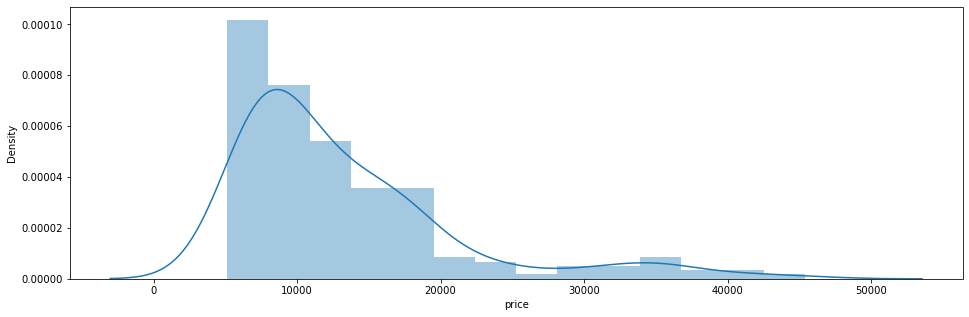

In [124]:
plt.figure(figsize=(16,5))
sns.distplot(df['price'])

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

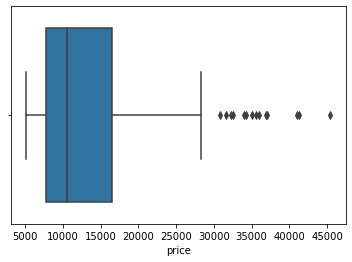

In [125]:
sns.boxplot(df['price'])

In [126]:
percentile25 = df['price'].quantile(0.25)
percentile75 = df['price'].quantile(0.75)
print(percentile25)
print(percentile75)

iqr = percentile75-percentile25
print('IQR',iqr)

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 -1.5*iqr

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

# df['highway_mpg'] = np.where(df['highway_mpg']>upper_limit,upper_limit, np.where(df['highway_mpg']<lower_limit,lower_limit,df['highway_mpg']))

# print('BOX PLOT AFTER HANDELLING MISSING VALUES')
# sns.boxplot(df['highway_mpg'])

7788.0
16500.0
IQR 8712.0
Upper Limit 29568.0
Lower Limit -5280.0


In [127]:
df.loc[np.where(df['price']>upper_limit)[0]]

symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
15           2              115.0     2          0           0             4   
16           2              115.0     2          0           0             2   
17           2              115.0     2          0           0             4   
47           2              145.0     7          0           0             4   
48           2              115.0     7          0           0             4   
49           2              115.0     7          0           0             2   
70           1               93.0     9          1           1             4   
71           1              115.0     9          0           0             4   
72           5              142.0     9          0           0             2   
73           2              115.0     9          0           0             4   
74           3              115.0     9          0           0             2   
126          5              115.0    15          0           0             2   
127          5              115.0    15          0           0             2   
128          5              115.0    15          0           0             2   

     body_style  drive_wheels  engine_location  wheel_base  length  width  \
15            3             1                1      103.50   189.0   66.9   
16            3             1                1      103.50   193.8   67.9   
17            3             1                1      110.00   197.0   70.9   
47            3             1                1      113.00   199.6   69.6   
48            3             1                1      113.00   199.6   69.6   
49            3             1                1      102.00   191.7   70.6   
70            3             1                1      114.25   202.6   71.1   
71            3             1                1      114.25   202.6   71.1   
72            0             1                1       96.60   180.3   70.5   
73            3             1                1      114.25   208.1   71.1   
74            1             1                1      112.00   199.2   71.1   
126           1             1                0       89.50   168.9   65.0   
127           1             1                0       89.50   168.9   65.0   
128           0             1                0       89.50   168.9   65.0   

     height  curb_weight  engine_type  engine_size  fuel_system  bore  stroke  \
15     55.7         3230            3        207.0            5  3.62    3.39   
16     53.7         3380            3        207.0            5  3.62    3.39   
17     56.3         3505            3        207.0            5  3.62    3.39   
47     52.8         4066            0        207.0            5  3.63    3.86   
48     52.8         4066            0        207.0            5  3.63    3.86   
49     47.8         3950            5        207.0            5  3.54    2.76   
70     56.3         3770            3        183.0            3  3.58    3.64   
71     56.5         3740            5        207.0            5  3.46    3.10   
72     50.8         3685            5        207.0            5  3.46    3.10   
73     56.7         3900            5        207.0            5  3.80    3.35   
74     55.4         3715            5        207.0            5  3.80    3.35   
126    51.6         2756            4        194.0            5  3.74    2.90   
127    51.6         2756            4        194.0            5  3.74    2.90   
128    51.6         2800            4        194.0            5  3.74    2.90   

     compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg    price  \
15                 8.0       182.0    5400.0      16.0         22.0  30760.0   
16                 8.0       182.0    5400.0      16.0         22.0  41315.0   
17                 8.0       182.0    5400.0      15.0         20.0  36880.0   
47                 8.1       176.0    4750.0      15.0         19.0  32250.0   
48                 8.1       176

In [128]:
pd.set_option('display.max_rows', None)

In [129]:
df

symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
0            5              115.0     0          0           0             2   
1            5              115.0     0          0           0             2   
2            3              115.0     0          0           0             2   
3            4              164.0     1          0           0             4   
4            4              164.0     1          0           0             4   
5            4              115.0     1          0           0             2   
6            3              158.0     1          0           0             4   
7            3              115.0     1          0           0             4   
8            3              158.0     1          0           1             4   
9            2              115.0     1          0           1             2   
10           4              191.0     2          0           0             2   
11           2              191.0     2          0           0             4   
12           2              188.0     2          0           0             2   
13           2              188.0     2          0           0             4   
14           3              115.0     2          0           0             4   
15           2              115.0     2          0           0             4   
16           2              115.0     2          0           0             2   
17           2              115.0     2          0           0             4   
18           4              121.0     3          0           0             2   
19           3               98.0     3          0           0             2   
20           2               81.0     3          0           0             4   
21           3              118.0     4          0           0             2   
22           3              118.0     4          0           0             2   
23           3              118.0     4          0           1             2   
24           3              148.0     4          0           0             4   
25           3              148.0     4          0           0             4   
26           3              148.0     4          0           0             4   
27           3              148.0     4          0           1             4   
28           1              110.0     4          0           0             4   
29           5              145.0     4          0           1             2   
30           4              137.0     5          0           0             2   
31           4              137.0     5          0           0             2   
32           3              101.0     5          0           0             2   
33           3              101.0     5          0           0             2   
34           3              101.0     5          0           0             2   
35           2              110.0     5          0           0             4   
36           2               78.0     5          0           0             4   
37           2              106.0     5          0           0             2   
38           2              106.0     5          0           0             2   
39           2               85.0     5          0           0             4   
40           2               85.0     5          0           0             4   
41           2               85.0     5          0           0             4   
42           3              107.0     5          0           0             2   
43           2              115.0     6          0           0             4   
44           3              115.0     6          0           0             2   
45           2              115.0     6          0           0             4   
46           4              115.0     6          0           0             2   
47           2              145.0     7          0           0             4   
48           2              115.0     7          0           0             4   
49   

# Scalling of data

# Feature Selection

In [130]:
# copying the actual dataframe

df1 = df.copy()
df1

symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
0            5              115.0     0          0           0             2   
1            5              115.0     0          0           0             2   
2            3              115.0     0          0           0             2   
3            4              164.0     1          0           0             4   
4            4              164.0     1          0           0             4   
5            4              115.0     1          0           0             2   
6            3              158.0     1          0           0             4   
7            3              115.0     1          0           0             4   
8            3              158.0     1          0           1             4   
9            2              115.0     1          0           1             2   
10           4              191.0     2          0           0             2   
11           2              191.0     2          0           0             4   
12           2              188.0     2          0           0             2   
13           2              188.0     2          0           0             4   
14           3              115.0     2          0           0             4   
15           2              115.0     2          0           0             4   
16           2              115.0     2          0           0             2   
17           2              115.0     2          0           0             4   
18           4              121.0     3          0           0             2   
19           3               98.0     3          0           0             2   
20           2               81.0     3          0           0             4   
21           3              118.0     4          0           0             2   
22           3              118.0     4          0           0             2   
23           3              118.0     4          0           1             2   
24           3              148.0     4          0           0             4   
25           3              148.0     4          0           0             4   
26           3              148.0     4          0           0             4   
27           3              148.0     4          0           1             4   
28           1              110.0     4          0           0             4   
29           5              145.0     4          0           1             2   
30           4              137.0     5          0           0             2   
31           4              137.0     5          0           0             2   
32           3              101.0     5          0           0             2   
33           3              101.0     5          0           0             2   
34           3              101.0     5          0           0             2   
35           2              110.0     5          0           0             4   
36           2               78.0     5          0           0             4   
37           2              106.0     5          0           0             2   
38           2              106.0     5          0           0             2   
39           2               85.0     5          0           0             4   
40           2               85.0     5          0           0             4   
41           2               85.0     5          0           0             4   
42           3              107.0     5          0           0             2   
43           2              115.0     6          0           0             4   
44           3              115.0     6          0           0             2   
45           2              115.0     6          0           0             4   
46           4              115.0     6          0           0             2   
47           2              145.0     7          0           0             4   
48           2              115.0     7          0           0             4   
49   

In [131]:
X = df1.drop('price',axis =1)
X

symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
0            5              115.0     0          0           0             2   
1            5              115.0     0          0           0             2   
2            3              115.0     0          0           0             2   
3            4              164.0     1          0           0             4   
4            4              164.0     1          0           0             4   
5            4              115.0     1          0           0             2   
6            3              158.0     1          0           0             4   
7            3              115.0     1          0           0             4   
8            3              158.0     1          0           1             4   
9            2              115.0     1          0           1             2   
10           4              191.0     2          0           0             2   
11           2              191.0     2          0           0             4   
12           2              188.0     2          0           0             2   
13           2              188.0     2          0           0             4   
14           3              115.0     2          0           0             4   
15           2              115.0     2          0           0             4   
16           2              115.0     2          0           0             2   
17           2              115.0     2          0           0             4   
18           4              121.0     3          0           0             2   
19           3               98.0     3          0           0             2   
20           2               81.0     3          0           0             4   
21           3              118.0     4          0           0             2   
22           3              118.0     4          0           0             2   
23           3              118.0     4          0           1             2   
24           3              148.0     4          0           0             4   
25           3              148.0     4          0           0             4   
26           3              148.0     4          0           0             4   
27           3              148.0     4          0           1             4   
28           1              110.0     4          0           0             4   
29           5              145.0     4          0           1             2   
30           4              137.0     5          0           0             2   
31           4              137.0     5          0           0             2   
32           3              101.0     5          0           0             2   
33           3              101.0     5          0           0             2   
34           3              101.0     5          0           0             2   
35           2              110.0     5          0           0             4   
36           2               78.0     5          0           0             4   
37           2              106.0     5          0           0             2   
38           2              106.0     5          0           0             2   
39           2               85.0     5          0           0             4   
40           2               85.0     5          0           0             4   
41           2               85.0     5          0           0             4   
42           3              107.0     5          0           0             2   
43           2              115.0     6          0           0             4   
44           3              115.0     6          0           0             2   
45           2              115.0     6          0           0             4   
46           4              115.0     6          0           0             2   
47           2              145.0     7          0           0             4   
48           2              115.0     7          0           0             4   
49   

In [132]:
y = df1['price']
y

0      13495.000000
1      16500.000000
2      16500.000000
3      13950.000000
4      17450.000000
5      15250.000000
6      17710.000000
7      18920.000000
8      23875.000000
9      13207.129353
10     16430.000000
11     16925.000000
12     20970.000000
13     21105.000000
14     24565.000000
15     30760.000000
16     41315.000000
17     36880.000000
18      5151.000000
19      6295.000000
20      6575.000000
21      5572.000000
22      6377.000000
23      7957.000000
24      6229.000000
25      6692.000000
26      7609.000000
27      8558.000000
28      8921.000000
29     12964.000000
30      6479.000000
31      6855.000000
32      5399.000000
33      6529.000000
34      7129.000000
35      7295.000000
36      7295.000000
37      7895.000000
38      9095.000000
39      8845.000000
40     10295.000000
41     12945.000000
42     10345.000000
43      6785.000000
44     13207.129353
45     13207.129353
46     11048.000000
47     32250.000000
48     35550.000000
49     36000.000000


In [133]:
# train test split

from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Linear Regression

In [135]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [136]:
linear_reg = LinearRegression()

## feature scalling

In [137]:
# as of now we know that the features are noramlly distrubuted so we are using normalization

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
minmax=MinMaxScaler()

In [140]:
X_train_scaled = minmax.fit_transform(X_train)
X_train_scaled

array([[1.        , 0.96031746, 0.71428571, ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.33333333, 0.23809524, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.20634921, 0.9047619 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.6       , 0.45238095, 0.57142857, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.9047619 , ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.34126984, 0.57142857, ..., 0.        , 0.        ,
        0.        ]])

In [141]:
X_test_scaled = minmax.transform(X_test)
X_test_scaled

array([[0.4       , 0.3968254 , 0.0952381 , ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.3968254 , 0.04761905, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.32539683, 0.57142857, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.8       , 0.57142857, 0.23809524, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.97619048, 0.0952381 , ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.35714286, 0.23809524, ..., 0.        , 0.        ,
        0.        ]])

## training model

In [142]:
linear_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [143]:
linear_reg.score(X_test_scaled,y_test)

0.7825112402810398

## Tesing data evolution

In [144]:
y_pred = linear_reg.predict(X_test_scaled)
y_pred

array([24844.31950116, 21675.89161106,  9727.32014587, 14264.45019436,
       21203.37576402,  6756.68154459,  7123.19131064,  5035.85389204,
        7947.11109857,  5580.00517767, 12356.07998638,  7463.79495467,
       14474.61455724, 12172.64075894, 38174.68931058,  6209.12718239,
       12072.52169638, 14626.6545317 ,  8816.34169721,  9733.98267099,
       10937.25981832, 19403.83871012,  9227.81534717,  7823.00717737,
        6389.5100371 , 24194.16522918, 14279.40822696, 13956.38612474,
        5072.03799392, 14917.00586884, 22158.03325315,  6591.69976886,
        5164.8948845 , 20796.17944002,  6929.23768274, 23389.77902969,
       13013.22127313, 13230.76240011,  8195.92697679, 14981.69069261,
        7601.27326866, 12366.05402218, 17183.18155872,  4570.69707497,
        6421.0772056 ,  9471.49601745,  8340.11122802,  5377.65461825,
       17309.06617192, 15815.84078402,  9291.82633404, 20811.37270347,
        8114.76348655, 10505.13542651,  5022.26372918, 13274.34831804,
      

In [145]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Value = {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Value = {rmse}")

r2_score_val = r2_score(y_test,y_pred)
print(f"R Squared Value = {r2_score_val}")

adj_r2 = 1 - ((1 - r2_score_val)*(len(X_test_scaled) - 1)) / (len(X_test_scaled) - len(X.columns) - 1)
print(f"Adjusted R Squared value = {adj_r2}")


Mean Squared Value = 14102634.92288662
Root Mean Squared Value = 3755.347510269405
R Squared Value = 0.7825112402810398
Adjusted R Squared value = 0.606169002671072


## Training Data Evolution

In [146]:
y_pred_train = linear_reg.predict(X_train_scaled)
y_pred_train

array([13708.59799388,  8863.80526557,  5116.90856144, 16663.85462369,
        7321.96362285,  5877.95286108, 19051.72394619,  9976.91547259,
       12180.26236617, 14766.19131725,  6115.23315557,  6404.7283057 ,
        6389.5100371 , 15917.32558671, 17384.62822253, 20103.05361419,
       19327.27846032,  5885.50577987, 12988.21292201,  6385.81712705,
       33278.        ,  8663.19011341,  6407.70679654,  6319.64301375,
       20154.8213236 , 11490.19123042,  6041.83020334, 13755.22068747,
       10550.19198588,  6778.00560053, 14706.96067475, 17430.74713244,
        5294.95275684, 20924.62850103,  8297.52924788, 33278.        ,
       15647.90203881,  9687.79386098, 18903.35923287,  7579.01688883,
       18746.88154711,  9726.56475381, 16924.91211641,  7462.53830516,
       14015.56577071, 10937.25981832,  7300.55501907,  6501.45779237,
       14826.92513905, 14043.85551495,  7377.24461476,  6483.59428981,
       25911.93750983, 20413.02294756, 13029.52622425,  6779.77418058,
      

In [147]:
mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Value = {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Value = {rmse}")

r2_score_val = r2_score(y_train,y_pred_train)
print(f"R Squared Value = {r2_score_val}")

adj_r2 = 1 - ((1 - r2_score_val)*(len(X_train_scaled) - 1)) / (len(X_train_scaled) - len(X.columns) - 1)
print(f"Adjusted R Squared value = {adj_r2}")

Mean Squared Value = 7029351.936355557
Root Mean Squared Value = 2651.2925029795483
R Squared Value = 0.8827376633928583
Adjusted R Squared value = 0.84955020963612


# KNN

In [148]:
from sklearn.neighbors import KNeighborsRegressor

In [149]:
knn = KNeighborsRegressor()

In [150]:
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [151]:
knn.score(X_test_scaled,y_test)

0.7701815471439745

## Tesing data evolution

In [152]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([24978.6       , 18299.6       ,  9254.6       , 11150.4       ,
       18737.        ,  6467.4       , 10005.6       ,  7479.        ,
       10974.2       ,  8127.2       , 18049.        ,  6834.8       ,
       13434.8       ,  9765.4       , 36852.8       ,  7416.2       ,
        7225.42587065, 10701.2       ,  8855.4       ,  9903.8       ,
        9269.8       , 17863.6       ,  6461.        ,  7225.42587065,
        7200.        , 26378.8       , 12060.2       , 14815.        ,
        6913.8       , 15575.        , 18737.        ,  7090.8       ,
        7887.        , 19243.6       ,  9860.        , 20459.        ,
       18146.8       , 12912.8       ,  7024.6       , 10701.2       ,
        7479.        , 11567.6       , 14918.        ,  7416.2       ,
        7048.        ,  8498.6       ,  7200.        ,  5758.8       ,
       15186.        , 10701.2       ,  7330.02587065, 16610.62587065,
        9093.42587065,  9834.6       ,  6913.8       , 15094.6       ,
      

In [153]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Value = {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Value = {rmse}")

r2_score_val = r2_score(y_test,y_pred)
print(f"R Squared Value = {r2_score_val}")

adj_r2 = 1 - ((1 - r2_score_val)*(len(X_test_scaled) - 1)) / (len(X_test_scaled) - len(X.columns) - 1)
print(f"Adjusted R Squared value = {adj_r2}")

Mean Squared Value = 14902129.854247404
Root Mean Squared Value = 3860.3276874181815
R Squared Value = 0.7701815471439745
Adjusted R Squared value = 0.5838422610444942


## Training Data Evolution

In [154]:
y_pred_train = knn.predict(X_train_scaled)
y_pred_train

array([14484.8       ,  8961.8       ,  7471.6       , 14872.4       ,
        6493.        ,  5992.2       , 14902.        ,  9356.        ,
       10131.8       , 10701.2       ,  6421.2       , 10004.2       ,
        7200.        , 16648.8       , 14737.        , 19438.        ,
       18813.6       ,  6421.2       , 10736.        ,  7090.8       ,
       23490.6       ,  8855.4       ,  5938.8       ,  7995.8       ,
       15186.        ,  9235.8       ,  6340.4       , 10873.        ,
       12477.6       ,  6700.4       , 15167.        , 19438.        ,
        6834.8       , 22427.8       ,  8606.        , 23490.6       ,
       15575.        ,  7479.        , 19812.        ,  7225.42587065,
       14902.        , 10005.6       , 14902.        ,  7695.4       ,
       15143.8       ,  9269.8       ,  7441.82587065,  6029.6       ,
       12060.2       , 13734.4       , 10005.6       ,  8359.6       ,
       20591.        , 16911.        ,  9254.6       ,  7225.42587065,
      

In [155]:
mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Value = {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Value = {rmse}")

r2_score_val = r2_score(y_train,y_pred_train)
print(f"R Squared Value = {r2_score_val}")

adj_r2 = 1 - ((1 - r2_score_val)*(len(X_train_scaled) - 1)) / (len(X_train_scaled) - len(X.columns) - 1)
print(f"Adjusted R Squared value = {adj_r2}")

Mean Squared Value = 11652111.114615481
Root Mean Squared Value = 3413.5188756788034
R Squared Value = 0.8056216578602184
Adjusted R Squared value = 0.7506089195187708


## Hyperparameter tuning

In [156]:
from sklearn.model_selection import KFold,GridSearchCV

In [157]:
algorithm = KNeighborsRegressor()

In [158]:
# Create 3 folds
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

In [159]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform','distance']}]

In [160]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [161]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.7026815579262751
KNeighborsRegressor(n_neighbors=6, weights='distance')
{'n_neighbors': 6, 'weights': 'distance'}


In [162]:
knn = KNeighborsRegressor(n_neighbors=6, weights='distance')

In [163]:
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [164]:
knn.score(X_test_scaled,y_test)

0.8414170423109399

## Tesing data evolution

In [165]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([27176.98858905, 18492.56763238,  8964.43259149, 10964.79250493,
       23186.55449209,  6313.43045848,  9216.56610292,  7414.77465344,
       10332.80481516,  7711.81358048, 16775.04310827,  7097.59063605,
       14028.58596561, 10032.54349968, 34028.10536653,  7361.32680298,
        7066.14086335, 14212.17078406,  7289.24883468,  9596.23175719,
       10245.        , 15672.75242744,  6335.01755189,  7106.9883971 ,
        7609.        , 27207.95383708, 11693.66567904, 16192.59389324,
        7013.52837916, 15869.87158314, 24361.33845675,  7142.04121793,
        8148.07055654, 19291.82793293,  9176.50810036, 20530.18834532,
       16316.90753209, 13643.49259307,  6940.79802691, 14824.95891689,
        7494.89916068, 11574.05904364, 15005.97271369,  7630.05516578,
        6883.48353623,  8033.7891161 ,  7231.46967218,  5684.53391495,
       17949.98233104, 12280.12460239,  7296.95970148, 16093.09632712,
        8814.9319815 , 10336.32414027,  7013.34339023, 16718.87532294,
      

In [166]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Value = {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Value = {rmse}")

r2_score_val = r2_score(y_test,y_pred)
print(f"R Squared Value = {r2_score_val}")

adj_r2 = 1 - ((1 - r2_score_val)*(len(X_test_scaled) - 1)) / (len(X_test_scaled) - len(X.columns) - 1)
print(f"Adjusted R Squared value = {adj_r2}")

Mean Squared Value = 10283002.947694046
Root Mean Squared Value = 3206.7121710085
R Squared Value = 0.8414170423109399
Adjusted R Squared value = 0.7128362658062967


## Training Data Evolution

In [167]:
y_pred_train = knn.predict(X_train_scaled)
y_pred_train

array([22018.        , 10345.        ,  6938.        , 18150.        ,
        7603.        ,  6095.        , 16695.        ,  9538.        ,
       12945.        , 12764.        ,  6669.        ,  7957.        ,
        7609.        , 18620.        , 16845.        , 18150.        ,
       16500.        ,  6189.        , 11048.        ,  7609.        ,
       33278.        ,  6989.        ,  5118.        ,  7295.        ,
       17075.        ,  9720.        ,  6377.        , 15510.        ,
       13845.        ,  6529.        , 16925.        , 18950.        ,
        8058.        , 17710.        ,  8558.        , 33278.        ,
       15985.        ,  7126.        , 17450.        ,  5399.        ,
       12440.        ,  9495.        , 16630.        ,  8013.        ,
       16430.        , 10245.        ,  5572.        ,  5348.        ,
       11199.        , 14997.5       ,  7995.        ,  7975.        ,
       31600.        , 22470.        , 11245.        , 13207.12935323,
      

In [168]:
mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Value = {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Value = {rmse}")

r2_score_val = r2_score(y_train,y_pred_train)
print(f"R Squared Value = {r2_score_val}")

adj_r2 = 1 - ((1 - r2_score_val)*(len(X_train_scaled) - 1)) / (len(X_train_scaled) - len(X.columns) - 1)
print(f"Adjusted R Squared value = {adj_r2}")

Mean Squared Value = 52344.98175182482
Root Mean Squared Value = 228.7902571173537
R Squared Value = 0.9991267907873369
Adjusted R Squared value = 0.9988796561045077


# Random Forest Regressor

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
random_forest = RandomForestRegressor()

In [171]:
random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [172]:
random_forest.score(X_test,y_test)

0.9026787782957777

## Tesing data evolution

In [173]:
y_pred = random_forest.predict(X_test)
y_pred

array([31416.91258706, 19401.03      ,  9152.71      , 13723.38      ,
       28172.73129353,  6807.67      ,  8287.14517413,  8091.16      ,
        9819.57      ,  8371.5738806 , 14022.885     ,  8011.22      ,
       13717.82      , 10860.48166667, 41208.04      ,  6494.59      ,
        8475.8400995 , 14721.17      ,  8293.23333333,  9327.77      ,
       10247.11      , 15178.95      ,  6734.5       ,  8267.41527363,
        7362.67      , 31449.79258706, 10757.05      , 16738.8       ,
        7128.84      , 16314.34      , 27281.42129353,  6804.89      ,
        8331.55      , 19261.88      ,  8267.35      , 26074.84129353,
       10287.        , 13603.06      ,  8306.73363184, 14873.32      ,
        8413.67      , 11029.92462687, 15817.08      ,  8043.32      ,
        7177.32      ,  8557.99666667,  7042.8       ,  7688.79129353,
       16076.94333333, 15234.7975    , 10060.43985075, 16912.99129353,
        7722.15681592, 10651.80666667,  7128.84      , 14846.605     ,
      

In [174]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Value = {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Value = {rmse}")

r2_score_val = r2_score(y_test,y_pred)
print(f"R Squared Value = {r2_score_val}")

adj_r2 = 1 - ((1 - r2_score_val)*(len(X_test) - 1)) / (len(X_test) - len(X.columns) - 1)
print(f"Adjusted R Squared value = {adj_r2}")

Mean Squared Value = 6310605.024910195
Root Mean Squared Value = 2512.091762836341
R Squared Value = 0.9026787782957777
Adjusted R Squared value = 0.8237696796166785


## Training Data Evolution

In [175]:
y_pred_train = random_forest.predict(X_train)
y_pred_train

array([20287.9       ,  9957.48666667,  7163.89      , 17859.54      ,
        7730.85      ,  6225.1       , 15940.9       ,  9592.265     ,
       13033.4125    , 14203.9       ,  6644.06      ,  8151.48      ,
        7362.67      , 17927.88      , 17586.4       , 18105.13      ,
       16851.69      ,  6335.8       , 11418.42      ,  7608.04      ,
       30276.67258706,  7767.06333333,  5704.88      ,  7346.15258706,
       16942.11      ,  9733.69666667,  6361.2038806 , 15534.47      ,
       13155.44      ,  6652.51129353, 15853.485     , 18406.53      ,
        7957.97      , 18349.93      ,  8593.82      , 30276.67258706,
       16295.99      ,  7473.39      , 17319.585     ,  7118.93716418,
       13469.3       ,  9061.91      , 15126.67      ,  8991.36      ,
       15734.23166667, 10247.11      ,  5758.56      ,  5640.99      ,
       11394.28      , 14948.78458333,  8471.4638806 ,  8055.03      ,
       28108.09129353, 20678.08      , 10655.49833333, 10339.63890547,
      

In [176]:
mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Value = {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Value = {rmse}")

r2_score_val = r2_score(y_train,y_pred_train)
print(f"R Squared Value = {r2_score_val}")

adj_r2 = 1 - ((1 - r2_score_val)*(len(X_train) - 1)) / (len(X_train) - len(X.columns) - 1)
print(f"Adjusted R Squared value = {adj_r2}")

Mean Squared Value = 1414128.7158634132
Root Mean Squared Value = 1189.1714409047222
R Squared Value = 0.9764097687828426
Adjusted R Squared value = 0.9697332882496849


# Hyperparameter Tuning for Random Forest

In [177]:
from sklearn.model_selection import RandomizedSearchCV

In [178]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [179]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [180]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [181]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [182]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [183]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [184]:
rf_random.best_score_

-8592329.172429595

In [185]:
predictions=rf_random.predict(X_test)

C:\Users\Expert\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

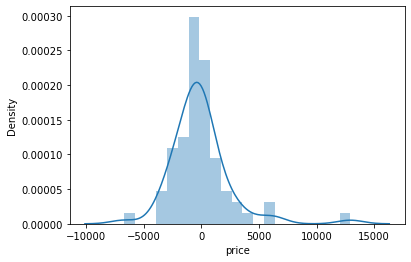

In [186]:
sns.distplot(y_test-predictions)

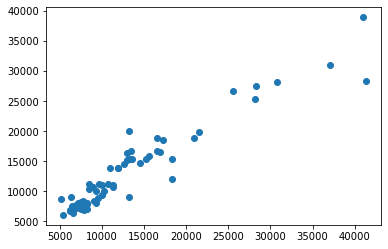

In [187]:
plt.scatter(y_test,predictions)

In [188]:
from sklearn import metrics

In [189]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1658.9849256718858
MSE: 6752289.684514995
RMSE: 2598.516823981518


In [190]:
r2_score_val = r2_score(y_test,predictions)
print(f"R Squared Value = {r2_score_val}")

adj_r2 = 1 - ((1 - r2_score_val)*(len(X_test) - 1)) / (len(X_test) - len(X.columns) - 1)
print(f"Adjusted R Squared value = {adj_r2}")

R Squared Value = 0.8958671824961556
Adjusted R Squared value = 0.8114351683038493


In [192]:
import xgboost as xgb

In [193]:
xgb_regessor = xgb.XGBRFRegressor()

In [194]:
xgb_regessor.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [195]:
predictions = xgb_regessor.predict(X_test)

In [196]:
predictions

array([31475.977 , 19732.71  ,  9258.108 , 13972.365 , 30788.373 ,
        6412.7173,  7997.563 ,  7756.0864,  9766.058 ,  8344.085 ,
       14046.193 ,  7833.932 , 13648.762 , 10569.512 , 42716.582 ,
        6621.046 ,  8658.181 , 14856.411 ,  8874.799 ,  9501.877 ,
       10217.389 , 15183.236 ,  6405.8286,  8847.469 ,  6930.048 ,
       31311.062 , 10529.215 , 17084.389 ,  6958.115 , 16900.84  ,
       29790.074 ,  6603.4663,  8155.3516, 18033.621 ,  8275.274 ,
       30190.195 , 10216.848 , 13930.093 ,  9229.796 , 14920.923 ,
        8322.385 , 10418.185 , 15633.335 ,  7899.602 ,  6898.8286,
        8544.733 ,  6632.4526,  7851.9253, 15948.944 , 15619.619 ,
       10791.986 , 16942.514 ,  8025.6304, 10246.557 ,  6958.115 ,
       14307.163 , 10529.215 , 13930.093 , 32716.434 ,  6123.3687,
       11631.657 , 19399.498 , 10578.843 , 17943.744 , 10950.321 ,
        9774.128 , 17931.96  ,  7357.734 ], dtype=float32)

In [197]:
print("Accuracy of Model::",r2_score(y_test,predictions))

Accuracy of Model:: 0.8944215100222379


In [199]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1832.6839168772979
MSE: 6846031.499696952
RMSE: 2616.492212810302


In [198]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_forest, file)